# ADM Homework 2
# Team #16: Iliyas Kyrykbayev, Andrea Potì, Xufeng Zhang

Contacts: ilyas.kyrykbayev@gmail.com, andrea.potto99@gmail.com, zhangxufeng1998@gmail.com

### Import libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt 
from collections import Counter
from itertools import compress
import time

### Load the dataset

In [2]:
df = pd.read_csv(r"C:\Users\User\Desktop\ADM\steam_reviews.csv")
df

,Unnamed: 0,app_id,app_name,review_id,language,review,timestamp_created,timestamp_updated,recommended,votes_helpful,...,steam_purchase,received_for_free,written_during_early_access,author.steamid,author.num_games_owned,author.num_reviews,author.playtime_forever,author.playtime_last_two_weeks,author.playtime_at_review,author.last_played
0,0,292030,The Witcher 3: Wild Hunt,85185598,schinese,不玩此生遗憾，RPG游戏里的天花板，太吸引人了,1611381629,1611381629,True,0,...,True,False,False,76561199095369542,6,2,1909.0,1448.0,1909.0,1.611343e+09
1,1,292030,The Witcher 3: Wild Hunt,85185250,schinese,拔DIAO无情打桩机--杰洛特!!!,1611381030,1611381030,True,0,...,True,False,False,76561198949504115,30,10,2764.0,2743.0,2674.0,1.611386e+09
2,2,292030,The Witcher 3: Wild Hunt,85185111,schinese,巫师3NB,1611380800,1611380800,True,0,...,True,False,False,76561199090098988,5,1,1061.0,1061.0,1060.0,1.611384e+09
3,3,292030,The Witcher 3: Wild Hunt,85184605,english,"One of the best RPG's of all time, worthy of a...",1611379970,1611379970,True,0,...,True,False,False,76561199054755373,5,3,5587.0,3200.0,5524.0,1.611384e+09
4,4,292030,The Witcher 3: Wild Hunt,85184287,schinese,大作,1611379427,1611379427,True,0,...,True,False,False,76561199028326951,7,4,217.0,42.0,217.0,1.610788e+09
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21747366,21747371,546560,Half-Life: Alyx,65645125,english,Holy balls,1584986704,1584986704,True,0,...,True,False,False,76561197967033932,431,7,432.0,0.0,29.0,1.586628e+09
21747367,21747372,546560,Half-Life: Alyx,65645115,english,"A tripod thing bears down on you, it looks imm...",1584986693,1584986693,True,0,...,False,False,False,76561198046495482,70,10,3296.0,15.0,24.0,1.611080e+09
21747368,21747373,546560,Half-Life: Alyx,65645100,english,Honestly this is the best vr game ever,1584986673,1584986673,True,0,...,True,False,False,76561198176379749,79,17,2654.0,0.0,34.0,1.591634e+09
21747369,21747374,546560,Half-Life: Alyx,65645066,english,Smooth turning is not working right now.\nIt a...,1584986631,1586382422,True,0,...,True,False,False,76561198041763187,140,3,210.0,0.0,12.0,1.589715e+09


## Let's load bonus dataframes

In [3]:
df1 = pd.read_csv(r"C:\Users\User\Desktop\ADM\steam_reviews_bonus_1.csv")
df1

C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3343: DtypeWarning: Columns (0,8,9,10,14,15,16) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


,Unnamed: 0,Unnamed: 0.1,app_id,app_name,review_id,language,review,timestamp_created,timestamp_updated,recommended,...,steam_purchase,received_for_free,written_during_early_access,author.steamid,author.num_games_owned,author.num_reviews,author.playtime_forever,author.playtime_last_two_weeks,author.playtime_at_review,author.last_played
0,0,0,292030.0,The Witcher 3: Wild Hunt,85185598,schinese,不玩此生遗憾，RPG游戏里的天花板，太吸引人了,1.034411e+09,1034410880.0,True,...,True,False,False,7.656120e+16,367.0,10.0,1909.0,1448.0,1909.0,1.021116e+09
1,1,1,292030.0,The Witcher 3: Wild Hunt,85185250,schinese,拔DIAO无情打桩机--杰洛特!!!,1.336568e+09,1336567596.0,True,...,False,False,False,7.656120e+16,11.0,112.0,2764.0,2743.0,2674.0,1.327515e+09
2,2,2,292030.0,The Witcher 3: Wild Hunt,85185111,schinese,巫师3NB,1.142145e+09,1142145175.0,True,...,True,False,False,7.656120e+16,53.0,1.0,1061.0,1061.0,1060.0,1.137779e+09
3,3,3,292030.0,The Witcher 3: Wild Hunt,85184605,english,"One of the best RPG's of all time, worthy of a...",9.801152e+08,980115225.0,True,...,True,False,True,7.656120e+16,168.0,1.0,5587.0,3200.0,5524.0,9.746538e+08
4,4,4,292030.0,The Witcher 3: Wild Hunt,85184287,schinese,大作,9.926147e+08,992614717.0,True,...,True,False,False,7.656120e+16,4.0,14.0,217.0,42.0,217.0,9.830412e+08
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9999999,9999995,9999997,252950.0,Rocket League,53011780,english,Wow!,1.439170e+09,1439169928.0,True,...,True,False,False,7.656120e+16,79.0,8.0,27593.0,138.0,24115.0,1.428738e+09
10000000,9999996,9999998,252950.0,Rocket League,53011748,english,Been playing for a while now pretty decent gam...,1.404570e+09,1404569575.0,True,...,False,False,False,7.656120e+16,40.0,7.0,98068.0,108.0,73633.0,1.399236e+09
10000001,9999997,9999999,252950.0,Rocket League,53011718,german,Echt Super Spiel und macht viel Spaß!\nBin jet...,1.119239e+09,1119239228.0,True,...,True,False,False,7.656120e+16,7.0,2.0,19065.0,0.0,36.0,1.105892e+09
10000002,9999998,10000000,252950.0,Rocket League,53011678,english,Solid competitive game. Worth getting into. Tr...,1.364989e+09,1364988521.0,True,...,True,False,False,7.656120e+16,48.0,4.0,71551.0,77.0,62315.0,1.352194e+09


### Checking general info and comparing data types with the main dataset

In [4]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000004 entries, 0 to 10000003
Data columns (total 24 columns):
 #   Column                          Dtype  
---  ------                          -----  
 0   Unnamed: 0                      object 
 1   Unnamed: 0.1                    int64  
 2   app_id                          float64
 3   app_name                        object 
 4   review_id                       int64  
 5   language                        object 
 6   review                          object 
 7   timestamp_created               float64
 8   timestamp_updated               object 
 9   recommended                     object 
 10  votes_helpful                   object 
 11  votes_funny                     float64
 12  weighted_vote_score             float64
 13  comment_count                   float64
 14  steam_purchase                  object 
 15  received_for_free               object 
 16  written_during_early_access     object 
 17  author.steamid           

### Removing unnecessary column

In [4]:
del df1['Unnamed: 0']

### Setting another column as index

In [5]:
df1['Unnamed: 0.1'].is_unique

True

In [6]:
df1.rename(columns={'Unnamed: 0.1':'id'}, inplace=True)
df1.set_index('id', inplace=True)
df1.head()

,app_id,app_name,review_id,language,review,timestamp_created,timestamp_updated,recommended,votes_helpful,votes_funny,...,steam_purchase,received_for_free,written_during_early_access,author.steamid,author.num_games_owned,author.num_reviews,author.playtime_forever,author.playtime_last_two_weeks,author.playtime_at_review,author.last_played
id,,,,,,,,,,,,,,,,,,,,,
0,292030.0,The Witcher 3: Wild Hunt,85185598,schinese,不玩此生遗憾，RPG游戏里的天花板，太吸引人了,1.034411e+09,1034410880.0,True,0,0.0,...,True,False,False,7.656120e+16,367.0,10.0,1909.0,1448.0,1909.0,1.021116e+09
1,292030.0,The Witcher 3: Wild Hunt,85185250,schinese,拔DIAO无情打桩机--杰洛特!!!,1.336568e+09,1336567596.0,True,0,0.0,...,False,False,False,7.656120e+16,11.0,112.0,2764.0,2743.0,2674.0,1.327515e+09
2,292030.0,The Witcher 3: Wild Hunt,85185111,schinese,巫师3NB,1.142145e+09,1142145175.0,True,0,0.0,...,True,False,False,7.656120e+16,53.0,1.0,1061.0,1061.0,1060.0,1.137779e+09
3,292030.0,The Witcher 3: Wild Hunt,85184605,english,"One of the best RPG's of all time, worthy of a...",9.801152e+08,980115225.0,True,0,0.0,...,True,False,True,7.656120e+16,168.0,1.0,5587.0,3200.0,5524.0,9.746538e+08
4,292030.0,The Witcher 3: Wild Hunt,85184287,schinese,大作,9.926147e+08,992614717.0,True,0,0.0,...,True,False,False,7.656120e+16,4.0,14.0,217.0,42.0,217.0,9.830412e+08


### After comparing datasets' data types, let's parse them so that they'll be similar

In [7]:
df1['app_id'] = df1['app_id'].astype(np.int64)

### Looks like there are NaN values in timestamp_created column, let's remove them

In [8]:
df1 = df1[df1['timestamp_created'].notna()]

In [9]:
df1['timestamp_created'] = df1['timestamp_created'].astype(np.int64)

<ipython-input-9-9f98d6d2011b>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['timestamp_created'] = df1['timestamp_created'].astype(np.int64)


### Here we faced another problem: there were not only numeric values, we simply removed them

In [10]:
df1 = df1[pd.to_numeric(df1['timestamp_updated'], errors='coerce').notnull()]

In [11]:
df1['timestamp_updated'] = df1['timestamp_updated'].astype(float).astype(np.int64)

In [12]:
df1['recommended'] = df1['recommended'].astype(bool)

In [13]:
df1['votes_helpful'] = df1['votes_helpful'].astype(np.int64)

In [14]:
df1['votes_funny'] = df1['votes_funny'].astype(np.int64)

In [15]:
df1['comment_count'] = df1['comment_count'].astype(np.int64)

In [16]:
df1['steam_purchase'] = df1['steam_purchase'].astype(bool)

In [17]:
df1['received_for_free'] = df1['received_for_free'].astype(bool)

In [18]:
df1['written_during_early_access'] = df1['written_during_early_access'].astype(bool)

In [19]:
df1['author.steamid'] = df1['author.steamid'].astype(np.int64)

In [20]:
df1['author.num_games_owned'] = df1['author.num_games_owned'].astype(np.int64)

In [21]:
df1['author.num_reviews'] = df1['author.num_reviews'].astype(np.int64)

### Everything else was simple enough, now our datasets match type-wise

In [23]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9999996 entries, 0 to 10000001
Data columns (total 22 columns):
 #   Column                          Dtype  
---  ------                          -----  
 0   app_id                          int64  
 1   app_name                        object 
 2   review_id                       int64  
 3   language                        object 
 4   review                          object 
 5   timestamp_created               int64  
 6   timestamp_updated               int64  
 7   recommended                     bool   
 8   votes_helpful                   int64  
 9   votes_funny                     int64  
 10  weighted_vote_score             float64
 11  comment_count                   int64  
 12  steam_purchase                  bool   
 13  received_for_free               bool   
 14  written_during_early_access     bool   
 15  author.steamid                  int64  
 16  author.num_games_owned          int64  
 17  author.num_reviews        

## Now to the second dataset, let's perform all the methods we did to the other one

In [23]:
df2 = pd.read_csv(r"C:\Users\User\Desktop\ADM\steam_reviews_bonus_2.csv")
df2

C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3343: DtypeWarning: Columns (0,8,9,10,14,15,16) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


,Unnamed: 0,Unnamed: 0.1,app_id,app_name,review_id,language,review,timestamp_created,timestamp_updated,recommended,...,steam_purchase,received_for_free,written_during_early_access,author.steamid,author.num_games_owned,author.num_reviews,author.playtime_forever,author.playtime_last_two_weeks,author.playtime_at_review,author.last_played
0,0,10000001,252950.0,Rocket League,53011669,spanish,juegaoz,1.560382e+09,1560381544.0,True,...,True,False,False,7.656120e+16,200.0,2.0,32539.0,415.0,2367.0,1.553751e+09
1,1,10000002,252950.0,Rocket League,53011639,spanish,El juego perfecto para todo amante del Futbol ...,1.221077e+09,1221076632.0,True,...,True,False,False,7.656120e+16,3.0,1.0,104293.0,0.0,81336.0,1.216889e+09
2,2,10000003,252950.0,Rocket League,53011606,dutch,dis geim very gud,9.787585e+08,978758528.0,True,...,True,False,True,7.656120e+16,9.0,15.0,36262.0,0.0,31369.0,9.705828e+08
3,3,10000004,252950.0,Rocket League,53011596,english,It's all fun and games until it's you versus y...,1.565559e+09,1565558703.0,True,...,True,False,False,7.656120e+16,65.0,2.0,34361.0,0.0,33888.0,1.552424e+09
4,4,10000005,252950.0,Rocket League,53011567,english,"Everytime when I think rockey league is fun, m...",1.499632e+09,1499632396.0,True,...,True,False,False,7.656120e+16,115.0,7.0,37264.0,202.0,27925.0,1.488265e+09
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6999999,6999995,16999998,323190.0,Frostpunk,46994790,spanish,Frio y nieve : 10/10\nPunk: 9/10\n\nCumple con...,1.528487e+09,1528486834.0,True,...,True,False,True,7.656120e+16,35.0,1.0,4064.0,0.0,1287.0,1.517937e+09
7000000,6999996,16999999,323190.0,Frostpunk,46994076,english,Good fun but not much replayability so limited...,1.392318e+09,1392317567.0,True,...,True,False,False,7.656120e+16,8.0,1.0,343.0,0.0,235.0,1.382510e+09
7000001,6999997,17000000,323190.0,Frostpunk,46993891,english,===[ Audience: ]===\nKids \nEveryone\nCasual ...,1.545249e+09,1545249119.0,True,...,True,False,True,7.656120e+16,62.0,4.0,1299.0,0.0,1200.0,1.531064e+09
7000002,6999998,17000001,323190.0,Frostpunk,46993752,spanish,Excelente!.,1.051967e+09,1051967069.0,True,...,True,False,False,7.656120e+16,91.0,3.0,1680.0,0.0,910.0,1.047596e+09


In [26]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7000004 entries, 0 to 7000003
Data columns (total 24 columns):
 #   Column                          Dtype  
---  ------                          -----  
 0   Unnamed: 0                      object 
 1   Unnamed: 0.1                    int64  
 2   app_id                          float64
 3   app_name                        object 
 4   review_id                       int64  
 5   language                        object 
 6   review                          object 
 7   timestamp_created               float64
 8   timestamp_updated               object 
 9   recommended                     object 
 10  votes_helpful                   object 
 11  votes_funny                     float64
 12  weighted_vote_score             float64
 13  comment_count                   float64
 14  steam_purchase                  object 
 15  received_for_free               object 
 16  written_during_early_access     object 
 17  author.steamid             

In [24]:
df2 = df2[pd.to_numeric(df2['Unnamed: 0'], errors='coerce').notnull()]
df2

,Unnamed: 0,Unnamed: 0.1,app_id,app_name,review_id,language,review,timestamp_created,timestamp_updated,recommended,...,steam_purchase,received_for_free,written_during_early_access,author.steamid,author.num_games_owned,author.num_reviews,author.playtime_forever,author.playtime_last_two_weeks,author.playtime_at_review,author.last_played
0,0,10000001,252950.0,Rocket League,53011669,spanish,juegaoz,1.560382e+09,1560381544.0,True,...,True,False,False,7.656120e+16,200.0,2.0,32539.0,415.0,2367.0,1.553751e+09
1,1,10000002,252950.0,Rocket League,53011639,spanish,El juego perfecto para todo amante del Futbol ...,1.221077e+09,1221076632.0,True,...,True,False,False,7.656120e+16,3.0,1.0,104293.0,0.0,81336.0,1.216889e+09
2,2,10000003,252950.0,Rocket League,53011606,dutch,dis geim very gud,9.787585e+08,978758528.0,True,...,True,False,True,7.656120e+16,9.0,15.0,36262.0,0.0,31369.0,9.705828e+08
3,3,10000004,252950.0,Rocket League,53011596,english,It's all fun and games until it's you versus y...,1.565559e+09,1565558703.0,True,...,True,False,False,7.656120e+16,65.0,2.0,34361.0,0.0,33888.0,1.552424e+09
4,4,10000005,252950.0,Rocket League,53011567,english,"Everytime when I think rockey league is fun, m...",1.499632e+09,1499632396.0,True,...,True,False,False,7.656120e+16,115.0,7.0,37264.0,202.0,27925.0,1.488265e+09
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6999999,6999995,16999998,323190.0,Frostpunk,46994790,spanish,Frio y nieve : 10/10\nPunk: 9/10\n\nCumple con...,1.528487e+09,1528486834.0,True,...,True,False,True,7.656120e+16,35.0,1.0,4064.0,0.0,1287.0,1.517937e+09
7000000,6999996,16999999,323190.0,Frostpunk,46994076,english,Good fun but not much replayability so limited...,1.392318e+09,1392317567.0,True,...,True,False,False,7.656120e+16,8.0,1.0,343.0,0.0,235.0,1.382510e+09
7000001,6999997,17000000,323190.0,Frostpunk,46993891,english,===[ Audience: ]===\nKids \nEveryone\nCasual ...,1.545249e+09,1545249119.0,True,...,True,False,True,7.656120e+16,62.0,4.0,1299.0,0.0,1200.0,1.531064e+09
7000002,6999998,17000001,323190.0,Frostpunk,46993752,spanish,Excelente!.,1.051967e+09,1051967069.0,True,...,True,False,False,7.656120e+16,91.0,3.0,1680.0,0.0,910.0,1.047596e+09


In [25]:
del df2['Unnamed: 0.1']

In [26]:
df2['Unnamed: 0'] = df2['Unnamed: 0'].astype(np.int64)

<ipython-input-26-2632c9777389>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['Unnamed: 0'] = df2['Unnamed: 0'].astype(np.int64)


In [27]:
df2.rename(columns={'Unnamed: 0':'id'}, inplace=True)
df2.set_index('id', inplace=True)
df2.head()

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\frame.py:5039: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(


,app_id,app_name,review_id,language,review,timestamp_created,timestamp_updated,recommended,votes_helpful,votes_funny,...,steam_purchase,received_for_free,written_during_early_access,author.steamid,author.num_games_owned,author.num_reviews,author.playtime_forever,author.playtime_last_two_weeks,author.playtime_at_review,author.last_played
id,,,,,,,,,,,,,,,,,,,,,
0,252950.0,Rocket League,53011669,spanish,juegaoz,1.560382e+09,1560381544.0,True,0,1.0,...,True,False,False,7.656120e+16,200.0,2.0,32539.0,415.0,2367.0,1.553751e+09
1,252950.0,Rocket League,53011639,spanish,El juego perfecto para todo amante del Futbol ...,1.221077e+09,1221076632.0,True,0,0.0,...,True,False,False,7.656120e+16,3.0,1.0,104293.0,0.0,81336.0,1.216889e+09
2,252950.0,Rocket League,53011606,dutch,dis geim very gud,9.787585e+08,978758528.0,True,2,1.0,...,True,False,True,7.656120e+16,9.0,15.0,36262.0,0.0,31369.0,9.705828e+08
3,252950.0,Rocket League,53011596,english,It's all fun and games until it's you versus y...,1.565559e+09,1565558703.0,True,2,0.0,...,True,False,False,7.656120e+16,65.0,2.0,34361.0,0.0,33888.0,1.552424e+09
4,252950.0,Rocket League,53011567,english,"Everytime when I think rockey league is fun, m...",1.499632e+09,1499632396.0,True,0,0.0,...,True,False,False,7.656120e+16,115.0,7.0,37264.0,202.0,27925.0,1.488265e+09


In [28]:
df2['app_id'] = df2['app_id'].astype(np.int64)

<ipython-input-28-c648e232b128>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['app_id'] = df2['app_id'].astype(np.int64)


In [29]:
df2 = df2[df2['timestamp_created'].notna()]

In [30]:
df2['timestamp_created'] = df2['timestamp_created'].astype(np.int64)

<ipython-input-30-577a6ba393e6>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['timestamp_created'] = df2['timestamp_created'].astype(np.int64)


In [31]:
df2 = df2[pd.to_numeric(df2['timestamp_updated'], errors='coerce').notnull()]

In [32]:
df2['timestamp_updated'] = df2['timestamp_updated'].astype(float).astype(np.int64)

In [33]:
df2['recommended'] = df2['recommended'].astype(bool)

In [34]:
df2['votes_helpful'] = df2['votes_helpful'].astype(np.int64)

In [35]:
df2['votes_funny'] = df2['votes_funny'].astype(np.int64)

In [36]:
df2['comment_count'] = df2['comment_count'].astype(np.int64)

In [37]:
df2['steam_purchase'] = df2['steam_purchase'].astype(bool)

In [38]:
df2['received_for_free'] = df2['received_for_free'].astype(bool)

In [39]:
df2['written_during_early_access'] = df2['written_during_early_access'].astype(bool)

In [40]:
df2['author.steamid'] = df2['author.steamid'].astype(np.int64)

In [41]:
df2['author.num_games_owned'] = df2['author.num_games_owned'].astype(np.int64)

In [42]:
df2['author.num_reviews'] = df2['author.num_reviews'].astype(np.int64)

In [48]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6999996 entries, 0 to 6999999
Data columns (total 22 columns):
 #   Column                          Dtype  
---  ------                          -----  
 0   app_id                          int64  
 1   app_name                        object 
 2   review_id                       int64  
 3   language                        object 
 4   review                          object 
 5   timestamp_created               int64  
 6   timestamp_updated               int64  
 7   recommended                     bool   
 8   votes_helpful                   int64  
 9   votes_funny                     int64  
 10  weighted_vote_score             float64
 11  comment_count                   int64  
 12  steam_purchase                  bool   
 13  received_for_free               bool   
 14  written_during_early_access     bool   
 15  author.steamid                  int64  
 16  author.num_games_owned          int64  
 17  author.num_reviews         

## Now let's merge dataframes to one

In [43]:
df = pd.concat([df, df1, df2])

### Let's get rid of the other two dataframes and make it easier to my computer

In [44]:
del df1
del df2

In [78]:
df.head()

,Unnamed: 0,app_id,app_name,review_id,language,review,timestamp_created,timestamp_updated,recommended,votes_helpful,...,steam_purchase,received_for_free,written_during_early_access,author.steamid,author.num_games_owned,author.num_reviews,author.playtime_forever,author.playtime_last_two_weeks,author.playtime_at_review,author.last_played
0,0.0,292030,The Witcher 3: Wild Hunt,85185598,schinese,不玩此生遗憾，RPG游戏里的天花板，太吸引人了,1611381629,1611381629,True,0,...,True,False,False,76561199095369542,6,2,1909.0,1448.0,1909.0,1.611343e+09
1,1.0,292030,The Witcher 3: Wild Hunt,85185250,schinese,拔DIAO无情打桩机--杰洛特!!!,1611381030,1611381030,True,0,...,True,False,False,76561198949504115,30,10,2764.0,2743.0,2674.0,1.611386e+09
2,2.0,292030,The Witcher 3: Wild Hunt,85185111,schinese,巫师3NB,1611380800,1611380800,True,0,...,True,False,False,76561199090098988,5,1,1061.0,1061.0,1060.0,1.611384e+09
3,3.0,292030,The Witcher 3: Wild Hunt,85184605,english,"One of the best RPG's of all time, worthy of a...",1611379970,1611379970,True,0,...,True,False,False,76561199054755373,5,3,5587.0,3200.0,5524.0,1.611384e+09
4,4.0,292030,The Witcher 3: Wild Hunt,85184287,schinese,大作,1611379427,1611379427,True,0,...,True,False,False,76561199028326951,7,4,217.0,42.0,217.0,1.610788e+09


In [45]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38747363 entries, 0 to 6999999
Data columns (total 23 columns):
 #   Column                          Dtype  
---  ------                          -----  
 0   Unnamed: 0                      float64
 1   app_id                          int64  
 2   app_name                        object 
 3   review_id                       int64  
 4   language                        object 
 5   review                          object 
 6   timestamp_created               int64  
 7   timestamp_updated               int64  
 8   recommended                     bool   
 9   votes_helpful                   int64  
 10  votes_funny                     int64  
 11  weighted_vote_score             float64
 12  comment_count                   int64  
 13  steam_purchase                  bool   
 14  received_for_free               bool   
 15  written_during_early_access     bool   
 16  author.steamid                  int64  
 17  author.num_games_owned    

### All our indexes got messed up. Let's just reset them

In [46]:
df.reset_index(drop=True, inplace=True)

In [47]:
del df['Unnamed: 0']

In [48]:
df.head()

,app_id,app_name,review_id,language,review,timestamp_created,timestamp_updated,recommended,votes_helpful,votes_funny,...,steam_purchase,received_for_free,written_during_early_access,author.steamid,author.num_games_owned,author.num_reviews,author.playtime_forever,author.playtime_last_two_weeks,author.playtime_at_review,author.last_played
0,292030,The Witcher 3: Wild Hunt,85185598,schinese,不玩此生遗憾，RPG游戏里的天花板，太吸引人了,1611381629,1611381629,True,0,0,...,True,False,False,76561199095369542,6,2,1909.0,1448.0,1909.0,1.611343e+09
1,292030,The Witcher 3: Wild Hunt,85185250,schinese,拔DIAO无情打桩机--杰洛特!!!,1611381030,1611381030,True,0,0,...,True,False,False,76561198949504115,30,10,2764.0,2743.0,2674.0,1.611386e+09
2,292030,The Witcher 3: Wild Hunt,85185111,schinese,巫师3NB,1611380800,1611380800,True,0,0,...,True,False,False,76561199090098988,5,1,1061.0,1061.0,1060.0,1.611384e+09
3,292030,The Witcher 3: Wild Hunt,85184605,english,"One of the best RPG's of all time, worthy of a...",1611379970,1611379970,True,0,0,...,True,False,False,76561199054755373,5,3,5587.0,3200.0,5524.0,1.611384e+09
4,292030,The Witcher 3: Wild Hunt,85184287,schinese,大作,1611379427,1611379427,True,0,0,...,True,False,False,76561199028326951,7,4,217.0,42.0,217.0,1.610788e+09


In [49]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38747363 entries, 0 to 38747362
Data columns (total 22 columns):
 #   Column                          Dtype  
---  ------                          -----  
 0   app_id                          int64  
 1   app_name                        object 
 2   review_id                       int64  
 3   language                        object 
 4   review                          object 
 5   timestamp_created               int64  
 6   timestamp_updated               int64  
 7   recommended                     bool   
 8   votes_helpful                   int64  
 9   votes_funny                     int64  
 10  weighted_vote_score             float64
 11  comment_count                   int64  
 12  steam_purchase                  bool   
 13  received_for_free               bool   
 14  written_during_early_access     bool   
 15  author.steamid                  int64  
 16  author.num_games_owned          int64  
 17  author.num_reviews       

## [RQ1] After collecting information, the Data Scientists have to know what dataset they are dealing with, so let's start with an Exploratory Data Analysis (EDA). What can you say about our dataset? Please summarize its main characteristics with visual and tabular methods.

### Let's start by dropping duplicates if there are any

In [50]:
df.drop_duplicates(inplace = True)

In [51]:
len(df)

38612436

In [52]:
38747363 - 38612436

134927

### Number of rows decreased from 38747363 to 38612436, that means there were 134927 duplicates

### General information about the given dataset

In [53]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38612436 entries, 0 to 38747362
Data columns (total 22 columns):
 #   Column                          Dtype  
---  ------                          -----  
 0   app_id                          int64  
 1   app_name                        object 
 2   review_id                       int64  
 3   language                        object 
 4   review                          object 
 5   timestamp_created               int64  
 6   timestamp_updated               int64  
 7   recommended                     bool   
 8   votes_helpful                   int64  
 9   votes_funny                     int64  
 10  weighted_vote_score             float64
 11  comment_count                   int64  
 12  steam_purchase                  bool   
 13  received_for_free               bool   
 14  written_during_early_access     bool   
 15  author.steamid                  int64  
 16  author.num_games_owned          int64  
 17  author.num_reviews       

### Making timestamps readable

In [6]:
df['changed_timestamp_created'] = pd.to_datetime(df['timestamp_created'], unit='s')
df['changed_timestamp_updated'] = pd.to_datetime(df['timestamp_updated'], unit='s')
df['author.last_played'] = pd.to_datetime(df['author.last_played'], unit='s')
df.head()

,app_id,app_name,review_id,language,review,timestamp_created,timestamp_updated,recommended,votes_helpful,votes_funny,...,steam_purchase,received_for_free,written_during_early_access,author.steamid,author.num_games_owned,author.num_reviews,author.playtime_forever,author.playtime_last_two_weeks,author.playtime_at_review,author.last_played
id,,,,,,,,,,,,,,,,,,,,,
0,292030,The Witcher 3: Wild Hunt,85185598,schinese,不玩此生遗憾，RPG游戏里的天花板，太吸引人了,2021-01-23 06:00:29,2021-01-23 06:00:29,True,0,0,...,True,False,False,76561199095369542,6,2,1909.0,1448.0,1909.0,2021-01-22 19:23:03
1,292030,The Witcher 3: Wild Hunt,85185250,schinese,拔DIAO无情打桩机--杰洛特!!!,2021-01-23 05:50:30,2021-01-23 05:50:30,True,0,0,...,True,False,False,76561198949504115,30,10,2764.0,2743.0,2674.0,2021-01-23 07:18:27
2,292030,The Witcher 3: Wild Hunt,85185111,schinese,巫师3NB,2021-01-23 05:46:40,2021-01-23 05:46:40,True,0,0,...,True,False,False,76561199090098988,5,1,1061.0,1061.0,1060.0,2021-01-23 06:36:17
3,292030,The Witcher 3: Wild Hunt,85184605,english,"One of the best RPG's of all time, worthy of a...",2021-01-23 05:32:50,2021-01-23 05:32:50,True,0,0,...,True,False,False,76561199054755373,5,3,5587.0,3200.0,5524.0,2021-01-23 06:35:44
4,292030,The Witcher 3: Wild Hunt,85184287,schinese,大作,2021-01-23 05:23:47,2021-01-23 05:23:47,True,0,0,...,True,False,False,76561199028326951,7,4,217.0,42.0,217.0,2021-01-16 09:10:49


### Checking the amount of reviews for each game

In [54]:
apps = df.groupby('app_name').nunique()
apps['author.steamid']

app_name
20XX                                       7220
A Hat in Time                             69852
A Short Hike                              11693
A Way Out                                 21876
ARK: Survival Evolved                    788136
                                          ...  
XCOM 2                                    61636
Yakuza 0                                  31775
Youtubers Life                            12621
theHunter: Call of the Wild™              67240
三国群英传8 Heroes of the Three Kingdoms 8     16219
Name: author.steamid, Length: 315, dtype: int64

### Plot the result

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 40857 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 23830 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 65290 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 19977 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 22269 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 32676 missing from c

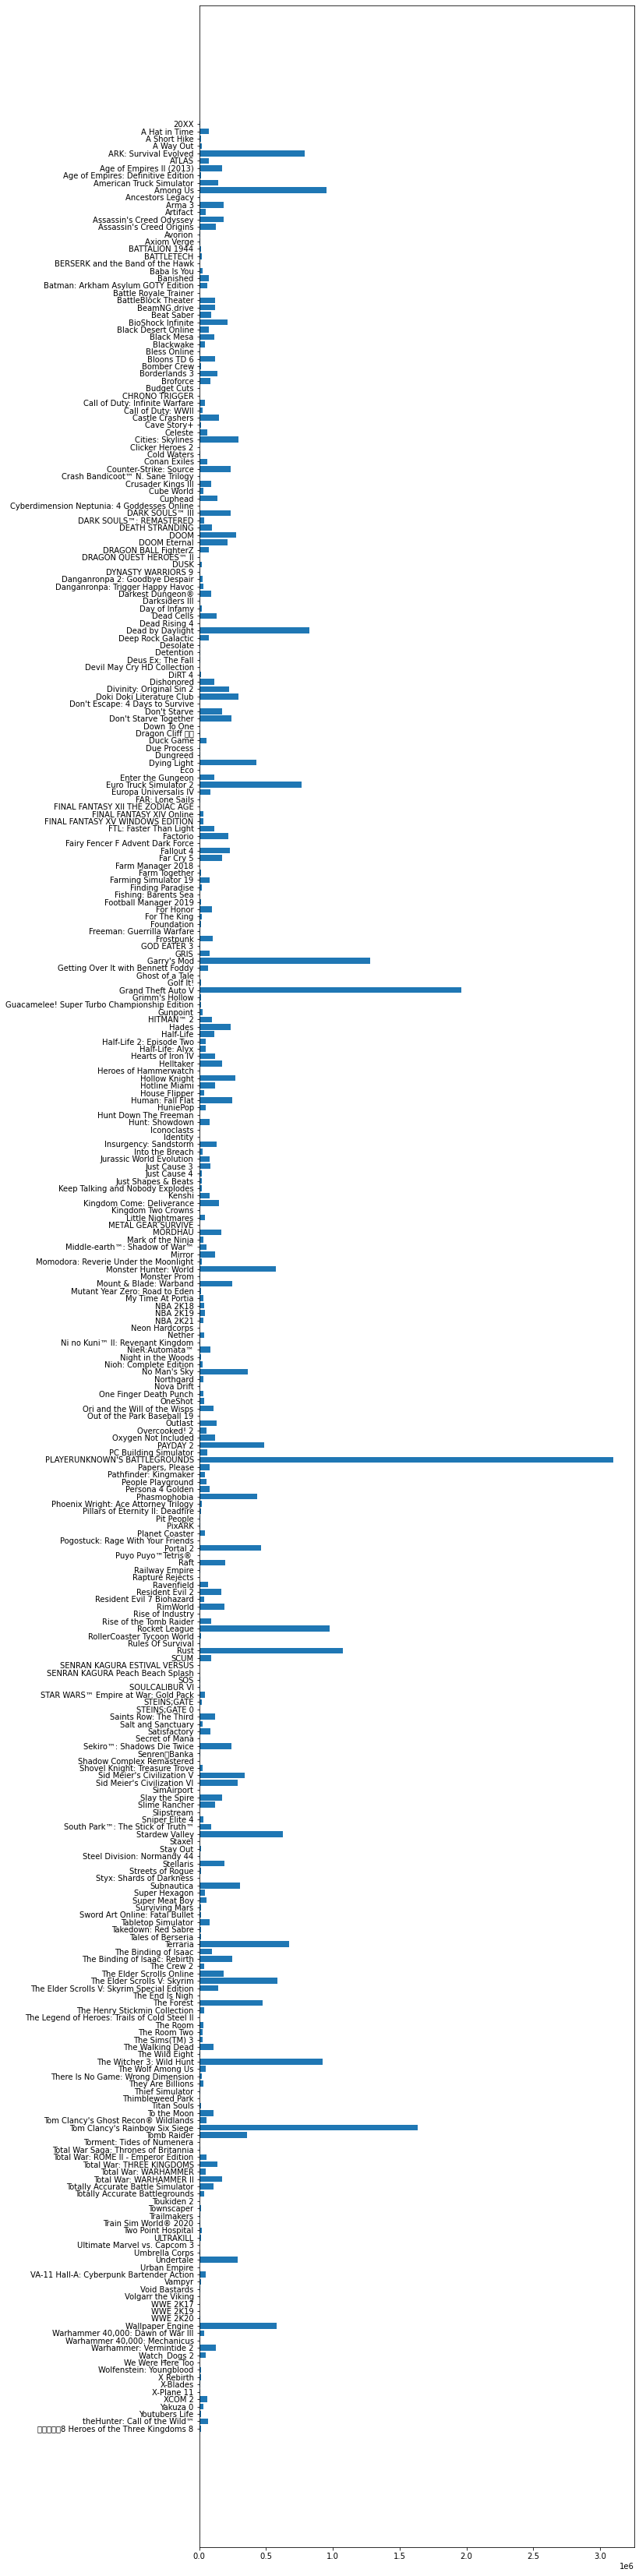

In [55]:
plt.figure(figsize = (10, 60))
plt.barh(apps.index, apps['author.steamid'])
plt.gca().invert_yaxis()

### Looks too crowded and it's too hard to read. Let's take only the popular games (more than 100 000 reviews)

In [56]:
# And also let's sort them by value
# using dictionary to sort both the names and quantities together
x = dict(zip(list(apps[apps['author.steamid'] > 100000].index), apps[apps['author.steamid'] > 100000]['author.steamid']))
x = dict(sorted(x.items(), key=lambda item: item[1]))
x

{'Totally Accurate Battle Simulator': 104048,
 'Ori and the Will of the Wisps': 104869,
 'To the Moon': 105257,
 'The Walking Dead': 105291,
 'Enter the Gungeon': 110477,
 'Dishonored': 112424,
 'Black Mesa': 113535,
 'Half-Life': 114406,
 'FTL: Faster Than Light': 114677,
 'Slime Rancher': 115865,
 'Hearts of Iron IV': 116255,
 'Saints Row: The Third': 118363,
 'BattleBlock Theater': 118373,
 'Bloons TD 6': 119245,
 'Oxygen Not Included': 119532,
 'Hotline Miami': 119857,
 'BeamNG.drive': 119951,
 'Mirror': 120127,
 'Warhammer: Vermintide 2': 123463,
 "Assassin's Creed Origins": 124281,
 'Insurgency: Sandstorm': 128952,
 'Dead Cells': 129231,
 'Outlast': 130734,
 'Total War: THREE KINGDOMS': 133607,
 'Borderlands 3': 133823,
 'Cuphead': 137033,
 'American Truck Simulator': 141915,
 'The Elder Scrolls V: Skyrim Special Edition': 142509,
 'Kingdom Come: Deliverance': 145515,
 'Castle Crashers': 149408,
 'MORDHAU': 164126,
 'Resident Evil 2': 164749,
 "Don't Starve": 169637,
 'Total War:

<BarContainer object of 88 artists>

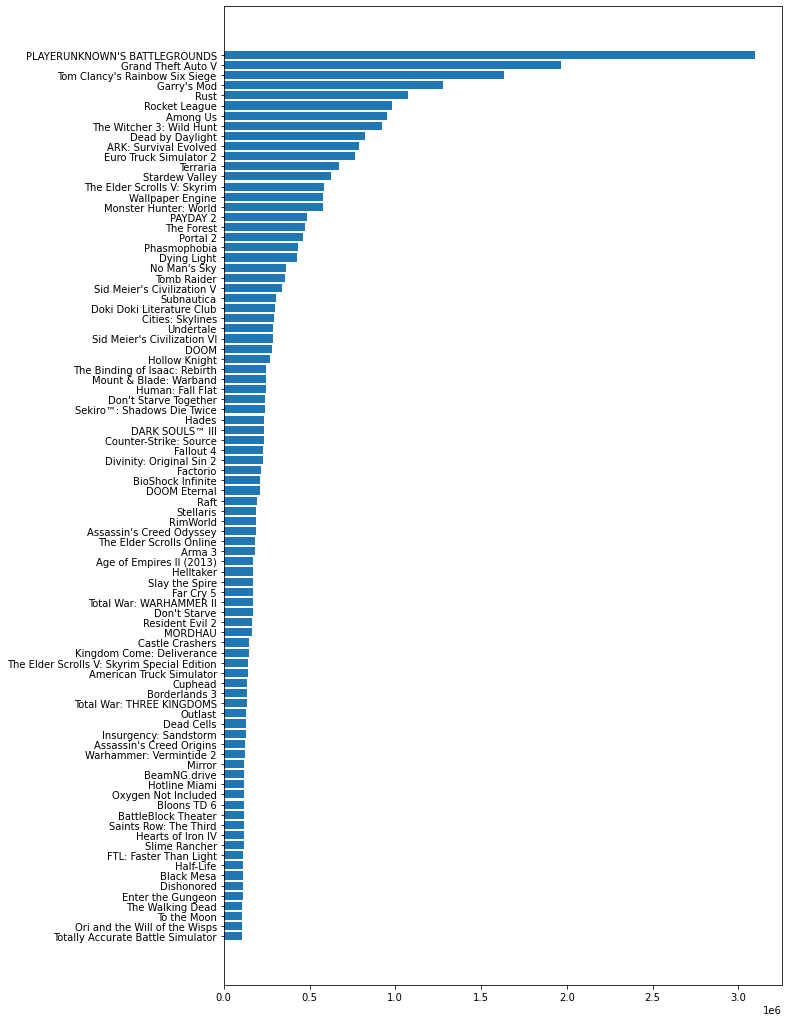

In [59]:
plt.figure(figsize = (10, 18))
plt.barh(list(x.keys()), list(x.values()))

In [60]:
#checking the amount of reviews in different languages
lang_count = df.groupby('language').nunique()
lang_count['author.steamid']

language
brazilian     1115949
bulgarian       16909
czech          190128
danish          85593
dutch          119959
english       9660892
finnish         79077
french         750805
german        1028357
greek           22038
hungarian      102026
italian        180913
japanese       112717
koreana        814488
latam          101405
norwegian       55088
polish         671680
portuguese     125436
romanian        52631
russian       2958229
schinese      4839322
spanish       1094069
swedish        117453
tchinese       304554
thai           181574
turkish        837516
ukrainian       31674
vietnamese      10207
Name: author.steamid, dtype: int64

<BarContainer object of 28 artists>

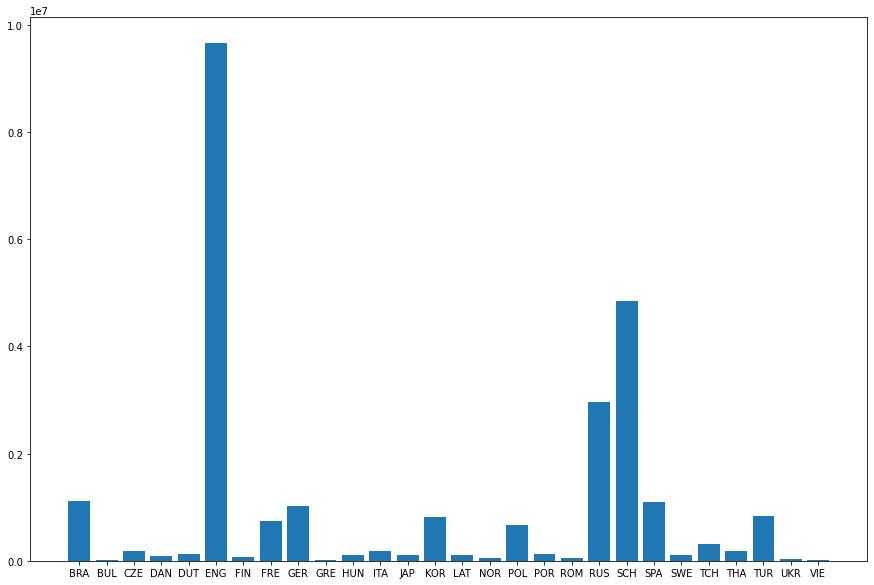

In [61]:
plt.figure(figsize = (15, 10))
plt.bar([''.join(str(x)[:3].upper()) for x in lang_count.index], lang_count['author.steamid'])

In [62]:
createdYM = [''.join(str(x)[0:7]) for x in pd.to_datetime(df['timestamp_created'], unit='s')]
createdYM = pd.DataFrame(createdYM)
createdYM.value_counts()

2019-11    1054922
2020-11     935182
2019-12     914322
2020-03     843672
2020-01     758257
            ...   
2003-02      63933
2010-02      63910
2001-02      63683
2002-02      63535
2000-01      19920
Length: 253, dtype: int64

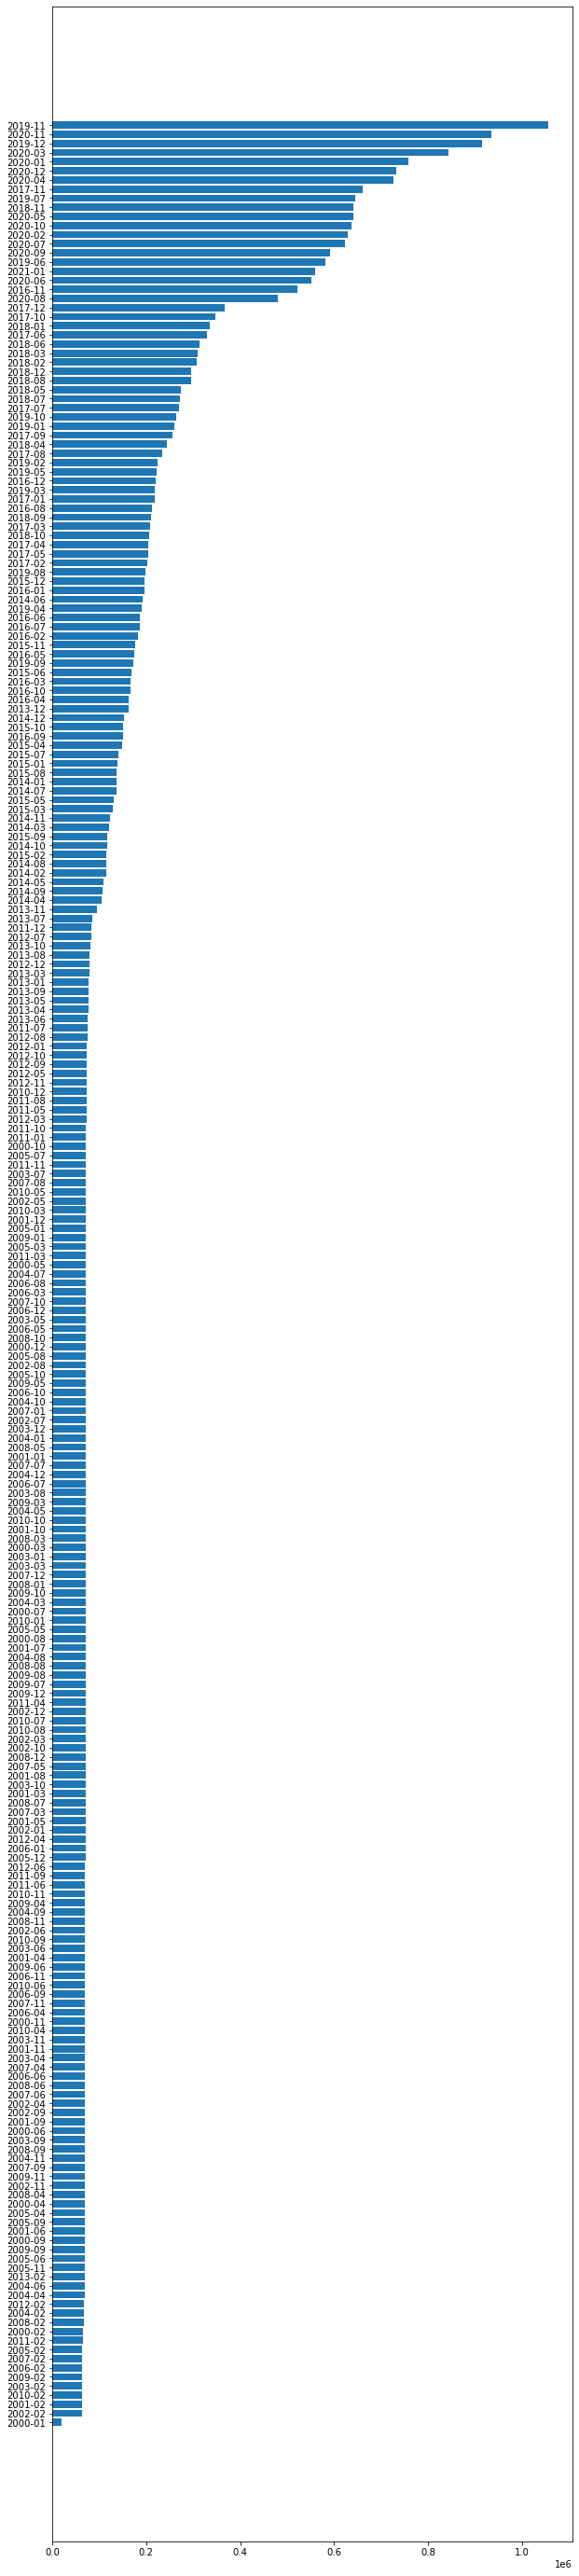

In [67]:
plt.figure(figsize = (10, 50))
plt.barh(createdYM[0].value_counts().index, createdYM.value_counts())
plt.gca().invert_yaxis()

In [68]:
recommended = df.groupby('recommended').nunique()
recommended['author.steamid']

recommended
False     4028156
True     16865406
Name: author.steamid, dtype: int64

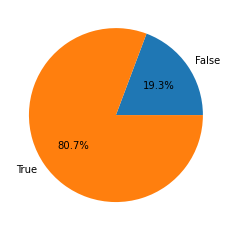

In [69]:
plt.pie(recommended['author.steamid'], labels = recommended.index, autopct='%1.1f%%')
plt.show() 

In [70]:
#checking how many people purchased games not from steam
steam_purchase = df.groupby('steam_purchase').nunique()
steam_purchase['author.steamid']

steam_purchase
False     6319874
True     16040591
Name: author.steamid, dtype: int64

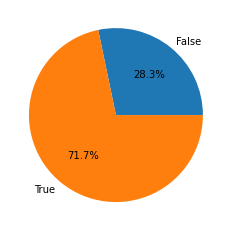

In [71]:
plt.pie(steam_purchase['author.steamid'], labels = steam_purchase.index, autopct='%1.1f%%')
plt.show() 

In [72]:
#checking how many people got the game for free
received_for_free = df.groupby('received_for_free').nunique()
received_for_free['author.steamid']

received_for_free
False    17930541
True      1335598
Name: author.steamid, dtype: int64

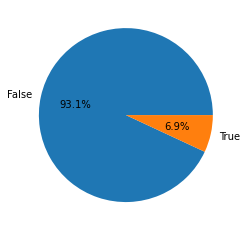

In [73]:
plt.pie(received_for_free['author.steamid'], labels = received_for_free.index, autopct='%1.1f%%')
plt.show() 

In [74]:
#checking how many people got the game for free
written_during_early_access = df.groupby('written_during_early_access').nunique()
written_during_early_access['author.steamid']

written_during_early_access
False    17281100
True      3529308
Name: author.steamid, dtype: int64

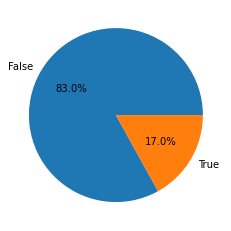

In [75]:
plt.pie(written_during_early_access['author.steamid'], labels = written_during_early_access.index, autopct='%1.1f%%')
plt.show() 

In [76]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38612436 entries, 0 to 38747362
Data columns (total 22 columns):
 #   Column                          Dtype  
---  ------                          -----  
 0   app_id                          int64  
 1   app_name                        object 
 2   review_id                       int64  
 3   language                        object 
 4   review                          object 
 5   timestamp_created               int64  
 6   timestamp_updated               int64  
 7   recommended                     bool   
 8   votes_helpful                   int64  
 9   votes_funny                     int64  
 10  weighted_vote_score             float64
 11  comment_count                   int64  
 12  steam_purchase                  bool   
 13  received_for_free               bool   
 14  written_during_early_access     bool   
 15  author.steamid                  int64  
 16  author.num_games_owned          int64  
 17  author.num_reviews       

## Delete all the unnecessary variables to clear up memory

In [123]:
del apps
del x
del lang_count
del createdYM
del recommended
del steam_purchase
del received_for_free
del written_during_early_access

## [RQ2] Let's explore the dataset by finding simple insights into the reviews.
- Plot the number of reviews for each application in descending order.
- What applications have the best Weighted Vote Score?
- Which applications have the most and the least recommendations?
- How many of these applications were purchased, and how many were given for free?

In [77]:
nappreview = df['app_name']
nappreview = list(nappreview)
votescore = df['weighted_vote_score']
votescore = list(votescore)

### Plot the number of reviews for each application in descending order.

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 19977 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 22269 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 32676 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 33521 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 20256 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 40857 missing from c

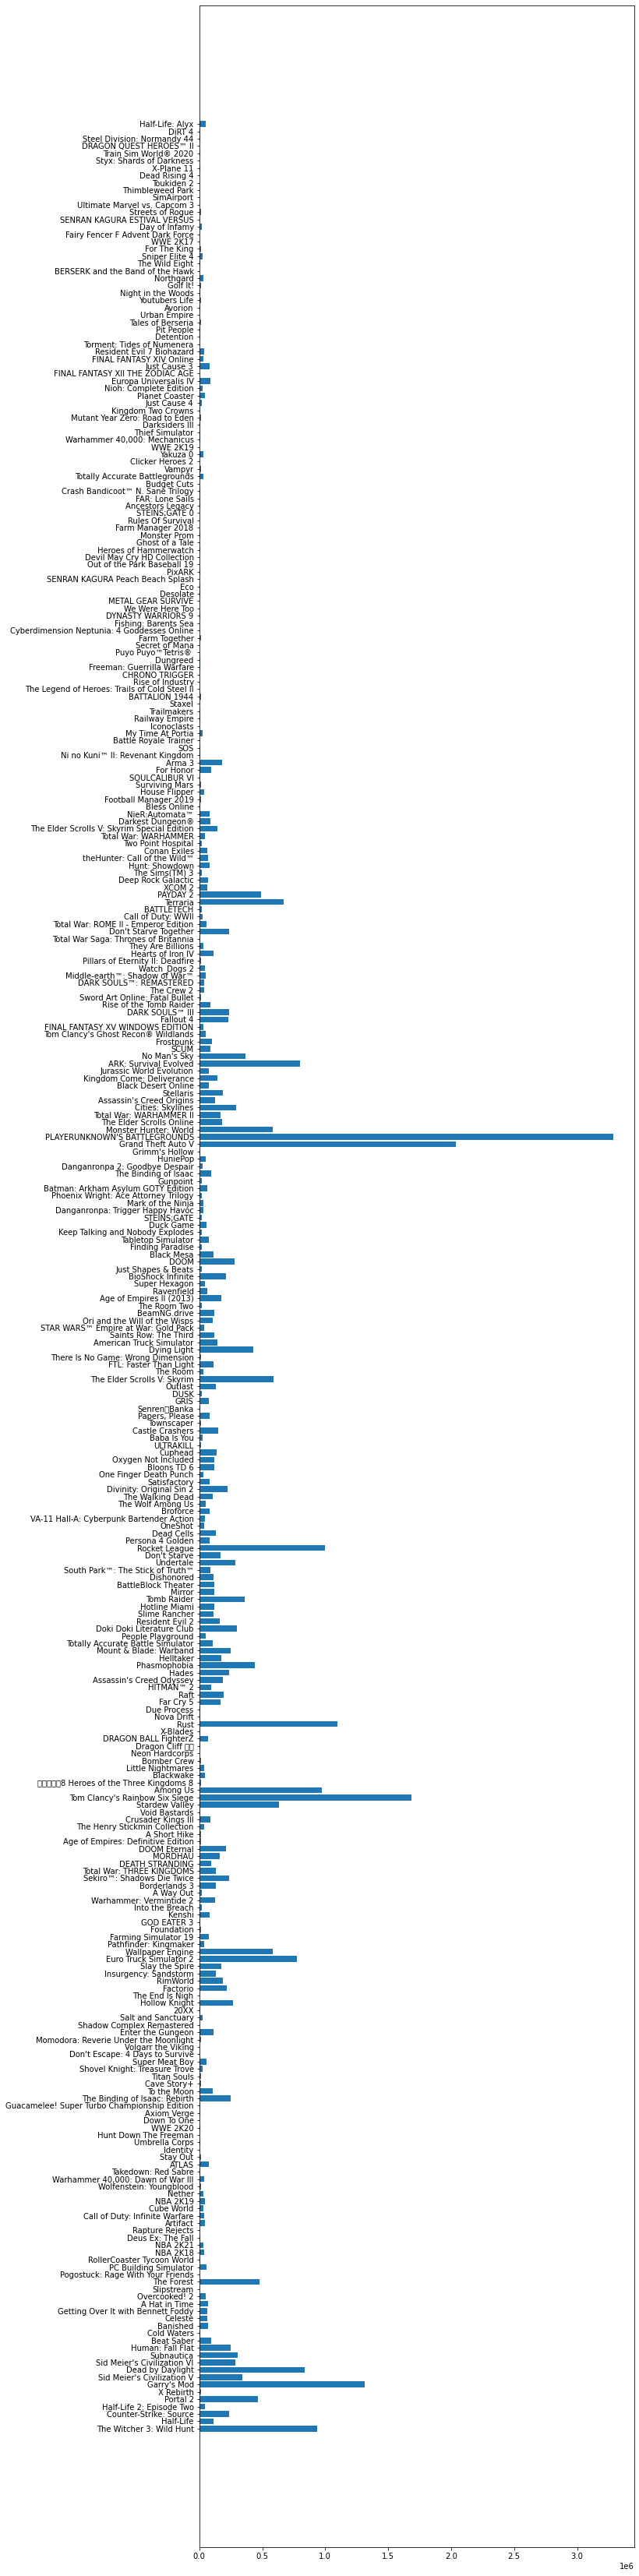

In [78]:
#2-1 the number of reviewers for each app
dict = {}
for key in nappreview:
    dict[key] = dict.get(key, 0) + 1 # count reviewers for different games

plt.figure(figsize = (10, 60))
plt.barh(list(dict.keys()), list(dict.values()))  
plt.show() # figure

### What applications have the best Weighted Vote Score?

In [79]:
#2-2 the best Weighted Vote Score?
appname = nappreview
data = {'app':appname,
        'score':votescore}
d = pd.DataFrame(data)
best = d.iloc[d.score.argmax()]
print(best['app'])

Stardew Valley


### Which applications have the most and the least recommendations?

In [80]:
#2-3 the most and the least recommendations?
rec = df['recommended']
full_recommend = list(compress(appname, rec))#drop the flase items
rdict = {}
for key in full_recommend:
    rdict[key] = rdict.get(key, 0) + 1 #count the number for each game

redata = pd.Series(rdict) # transfer to pd series
redata = redata.sort_values()

min_code = redata.keys()[0] # find the min value
print(f'min:{min_code}')

max_code = redata.keys()[-1] # find the max value
print(f'max:{max_code}')

min:Neon Hardcorps
max:PLAYERUNKNOWN'S BATTLEGROUNDS


### How many of these applications were purchased, and how many were given for free?

In [81]:
#2-4 How many of these applications were purchased, and how many were given for free?
# purchased part
pur = df['steam_purchase']
purchase = list(compress(appname, pur))

pdict = {}
for i in purchase:
    pdict[i] = pdict.get(i, 0) + 1

print('Number of each game purchased:',pdict)


Number of each game purchased: {'The Witcher 3: Wild Hunt': 805428, 'Half-Life': 88959, 'Counter-Strike: Source': 167933, 'Half-Life 2: Episode Two': 36141, 'Portal 2': 365652, 'X Rebirth': 10430, "Garry's Mod": 1066700, "Sid Meier's Civilization V": 239825, 'Dead by Daylight': 635498, "Sid Meier's Civilization VI": 212032, 'Subnautica': 259488, 'Human: Fall Flat': 191360, 'Beat Saber': 78475, 'Cold Waters': 4748, 'Banished': 57450, 'Celeste': 53578, 'Getting Over It with Bennett Foddy': 53674, 'A Hat in Time': 54728, 'Overcooked! 2': 38902, 'Slipstream': 1478, 'The Forest': 390646, 'Pogostuck: Rage With Your Friends': 3907, 'PC Building Simulator': 47474, 'RollerCoaster Tycoon World': 7149, 'NBA 2K18': 29462, 'NBA 2K21': 23397, 'Deus Ex: The Fall': 5672, 'Rapture Rejects': 1566, 'Artifact': 37887, 'Call of Duty: Infinite Warfare': 26107, 'Cube World': 21168, 'NBA 2K19': 32850, 'Nether': 27839, 'Wolfenstein: Youngblood': 12149, 'Warhammer 40,000: Dawn of War III': 24737, 'Takedown: Red

In [82]:
#2-4 free part
fr = df['received_for_free']
free = list(compress(appname, fr))

fdict = {}
for i in free:
    fdict[i] = fdict.get(i, 0) + 1

print('Number of each game free received:',fdict)

Number of each game free received: {'The Witcher 3: Wild Hunt': 51950, 'Half-Life': 4640, 'Counter-Strike: Source': 8703, 'Half-Life 2: Episode Two': 1651, 'Portal 2': 12934, 'X Rebirth': 237, "Garry's Mod": 44931, "Sid Meier's Civilization V": 6766, 'Dead by Daylight': 33332, "Sid Meier's Civilization VI": 6555, 'Subnautica': 7429, 'Human: Fall Flat': 7390, 'Beat Saber': 1928, 'Cold Waters': 110, 'Banished': 1236, 'Celeste': 1357, 'Getting Over It with Bennett Foddy': 1832, 'A Hat in Time': 1941, 'Overcooked! 2': 1133, 'Slipstream': 80, 'The Forest': 14679, 'Pogostuck: Rage With Your Friends': 131, 'PC Building Simulator': 1657, 'RollerCoaster Tycoon World': 233, 'NBA 2K18': 785, 'NBA 2K21': 730, 'Deus Ex: The Fall': 127, 'Rapture Rejects': 360, 'Artifact': 1363, 'Call of Duty: Infinite Warfare': 2624, 'Cube World': 1538, 'NBA 2K19': 1169, 'Nether': 606, 'Wolfenstein: Youngblood': 332, 'Warhammer 40,000: Dawn of War III': 1211, 'Takedown: Red Sabre': 232, 'ATLAS': 1947, 'Stay Out': 12

## Delete all the unnecessary variables to clear up memory

In [124]:
del nappreview
del votescore
del best
del d
del rec
del full_recommend
del rdict
del redata
del min_code
del max_code
del pur
del purchase
del pdict
del fr
del free
del fdict

## [RQ3] Now it's important to understand the preferred time to do reviews.
- What is the most common time that authors review an application? For example, authors usually write a review at 17:44.
- Create a function that receives as a parameter a list of time intervals and returns the plot the number of reviews for each of the intervals.
- Use the function that you created in the previous literal to plot the number of reviews between the following time intervals:

### What is the most common time that authors review an application? For example, authors usually write a review at 17:44.

In [83]:
#3-1 What is the most common time that authors review an application? 
timestamp = df['timestamp_created']
newtime = []
for i in timestamp:
    timearray = time.localtime(int(i))
    newtime.append(time.strftime("%H:%M", timearray))

timedict = {}
for i in newtime:
    timedict[i] = timedict.get(i, 0) + 1
    
timedata = pd.Series(timedict) # transfer to pd series
timedata = timedata.sort_values()

min_code = timedata.keys()[0] # find the least value
print(f'min:{min_code}')

max_code = timedata.keys()[-1] # find the most value
print(f'max:{max_code}')


min:12:01
max:20:50


### Create a function that receives as a parameter a list of time intervals and returns the plot the number of reviews for each of the intervals.
# &
### Use the function that you created in the previous literal to plot the number of reviews between the following time intervals:

In [84]:
# 3-2 + 3-3
newtimestamp = df['timestamp_created']
newtime2 = []
for i in timestamp.index:
    timearray = time.localtime(int(newtimestamp[i]))
    newtime2.append(time.strftime("%H:%M:%S", timearray)) #change the fromat of original data

In [85]:
# function that question required
def countn(initial,end):
    count = []
    for i in range(len(initial)):
        sumn = 0
        endi = time.strptime(end[i], '%H:%M:%S')
        endi = time.strftime("%H:%M:%S", endi)
        initiali = time.strptime(initial[i], '%H:%M:%S')
        initiali = time.strftime("%H:%M:%S", initiali)
        for j in range(len(newtime2)):
            if (newtime2[j] < endi) and (newtime2[j] > initiali):
                sumn = sumn + 1
        count.append(sumn)# count the number between initial[i] and end[i]
    #print(count)
    time_plot_dic = {}
    for i in range(len(initial)):
        time_key = initial[i] + '-' + end[i]
        time_plot_dic[time_key] = count[i]
    plt.bar(time_plot_dic.keys(), time_plot_dic.values())
    plt.xticks(rotation = 45)
    plt.show()
    return(count)

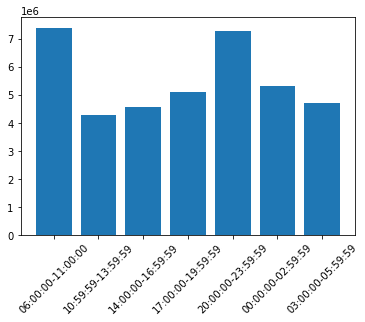

[7387016, 4290644, 4575401, 5078905, 7259529, 5313536, 4701957]

In [86]:
initial = ['06:00:00','10:59:59','14:00:00','17:00:00','20:00:00','00:00:00','03:00:00']
end = ['11:00:00','13:59:59','16:59:59','19:59:59','23:59:59','02:59:59','05:59:59']
countn(initial,end)

## Delete all the unnecessary variables to clear up memory

In [126]:
del timestamp
del newtime
del timearray
del timedict
del timedata
del max_code
del min_code
del newtimestamp
del newtime2
del initial
del end

## [RQ4] As Steam is a worldwide platform, the reviews can be done in many languages. Let's extract some information about it.

- What are the top 3 languages used to review applications?
- Create a function that receives as parameters both the name of a data set and a list of languages’ names and returns a data frame filtered only with the reviews written in the provided languages.
- Use the function created in the previous literal to find what percentage of these reviews (associated with the top 3 languages) were voted as funny?
- Use the function created in the literal “a” to find what percentage of these reviews (associated with the top 3 languages) were voted as helpful?

### What are the top 3 languages used to review applications?

In [87]:
languages = list(df.loc[:,"language"])
languages_counter = Counter(languages)
top_3_languages = [language_tuple[0] for language_tuple in languages_counter.most_common(3)]

In [88]:
# Print results
print(top_3_languages)

['english', 'schinese', 'russian']


### Create a function that receives as parameters both the name of a data set and a list of languages’ names and returns a data frame filtered only with the reviews written in the provided languages.

In [89]:
def review_of_given_languages(dataset, languages):
    return dataset[dataset['language'].isin(filter_languages)]

In [90]:
# Try function with one example
filter_languages = ['turkish', 'french', 'english']
review_of_given_languages(df, filter_languages)

,app_id,app_name,review_id,language,review,timestamp_created,timestamp_updated,recommended,votes_helpful,votes_funny,...,steam_purchase,received_for_free,written_during_early_access,author.steamid,author.num_games_owned,author.num_reviews,author.playtime_forever,author.playtime_last_two_weeks,author.playtime_at_review,author.last_played
3,292030,The Witcher 3: Wild Hunt,85184605,english,"One of the best RPG's of all time, worthy of a...",1611379970,1611379970,True,0,0,...,True,False,False,76561199054755373,5,3,5587.0,3200.0,5524.0,1.611384e+09
5,292030,The Witcher 3: Wild Hunt,85184171,english,"good story, good graphics. lots to do.",1611379264,1611379264,True,0,0,...,True,False,False,76561198170193529,11,1,823.0,823.0,823.0,1.611379e+09
6,292030,The Witcher 3: Wild Hunt,85184064,english,"dis gud,",1611379091,1611379091,True,0,0,...,True,False,False,76561198119302812,27,2,4192.0,3398.0,4192.0,1.611352e+09
7,292030,The Witcher 3: Wild Hunt,85183602,turkish,.\n,1611378312,1611378312,True,0,0,...,True,False,False,76561199084188849,9,1,2701.0,0.0,2701.0,1.609671e+09
18,292030,The Witcher 3: Wild Hunt,85180436,english,favorite game of all time cant wait for the Ne...,1611373086,1611373086,True,0,0,...,True,False,False,76561198065591528,33,1,23329.0,177.0,23329.0,1.611219e+09
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38747354,323190,Frostpunk,46995299,english,is a very COOL game,982734356,982734356,True,0,0,...,False,False,False,76561197877111824,794,1,1080.0,0.0,1080.0,9.736179e+08
38747356,323190,Frostpunk,46995196,english,gud,1051760804,1051760804,True,0,1,...,True,False,True,76561197884231456,24,20,511.0,0.0,511.0,1.043600e+09
38747357,323190,Frostpunk,46994967,english,This game has a steep learning curve and bruta...,1101971716,1111941457,True,1,0,...,True,False,False,76561197942532608,22,5,959.0,0.0,959.0,1.091236e+09
38747359,323190,Frostpunk,46994076,english,Good fun but not much replayability so limited...,1392317567,1392317567,True,1,0,...,True,False,False,76561197861661024,8,1,343.0,0.0,235.0,1.382510e+09


### Use the function created in the previous literal to find what percentage of these reviews (associated with the top 3 languages) were voted as funny?

In [91]:
# Count all rows of dataset filtered by 3 top languages
rows_df_top = review_of_given_languages(df, top_3_languages)
n_rows_df_top = rows_df_top.shape[0]

In [92]:
# Count funny_vote rows
n_rows_funny = rows_df_top[rows_df_top['votes_funny'] == 1].shape[0]
# Calculate percentage
percentage = (n_rows_funny/n_rows_df_top)*100

In [93]:
# Print results
print('{:.2f}'.format(percentage) + ' %')

7.67 %


### Use the function created in the literal “a” to find what percentage of these reviews (associated with the top 3 languages) were voted as helpful?

In [94]:
# Count helpful_vote rows
n_rows_helpful = rows_df_top[rows_df_top['votes_helpful'] == 1].shape[0]
# Calculate percentage
percentage = (n_rows_helpful/n_rows_df_top)*100

In [95]:
# Print results
print('{:.2f}'.format(percentage) + ' %')

16.38 %


## Delete all the unnecessary variables to clear up memory

In [127]:
del languages
del languages_counter
del top_3_languages
del filter_languages
del rows_df_top
del n_rows_df_top
del n_rows_funny
del percentage
del n_rows_helpful

## [RQ5] The reviews' authors are users from the game that provide their opinion on it. Now you can check how often they make reviews.

- Plot the top 10 most popular reviewers and the number of reviews.
- What applications did the most popular author review?
- How many applications did he purchase, and how many did he get as free? Provide the number (count) and the percentage.
- How many of the applications he purchased reviewed positively, and how many negatively? How about the applications he received for free?

### Plot the top 10 most popular reviewers and the number of reviews.

In [96]:
# Top 10 most popular authors are the ones that did most of reviews in this dataset.
authors = list(df.loc[:,'author.steamid'])
authors_counter = Counter(authors)
top_10_authors = authors_counter.most_common(10)

In [97]:
# Print results
for i in range(10):
    print("The " + str(i+1) + " most popular author is " + str(top_10_authors[i][0]) + " with " + str(top_10_authors[i][1]) + " reviews.")

The 1 most popular author is 76561198062813911 with 148 reviews.
The 2 most popular author is 76561198315585536 with 131 reviews.
The 3 most popular author is 76561198192166873 with 106 reviews.
The 4 most popular author is 76561198239163744 with 106 reviews.
The 5 most popular author is 76561198045381877 with 102 reviews.
The 6 most popular author is 76561198064946151 with 99 reviews.
The 7 most popular author is 76561198013146396 with 98 reviews.
The 8 most popular author is 76561198027973295 with 96 reviews.
The 9 most popular author is 76561197969749884 with 88 reviews.
The 10 most popular author is 76561197989746995 with 85 reviews.


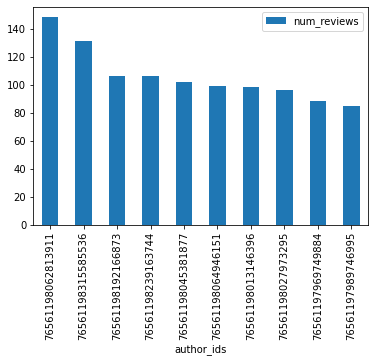

In [98]:
# Plot results in a histogram using matplotlib
df_plot = pd.DataFrame(top_10_authors, columns=['author_ids', 'num_reviews'])
df_plot.plot(kind='bar', x='author_ids')

### What applications did the most popular author review?

In [99]:
# Take the first id from the previous dictionary
most_popular_author_id = top_10_authors[0][0]
most_popular_author_id

76561198062813911

In [100]:
# Filter dataset for the most popular author
df_most_popular_author = df[df['author.steamid'] == most_popular_author_id]
applications = list(df_most_popular_author.loc[:,"app_name"])

In [101]:
print(applications)

['Half-Life', 'Counter-Strike: Source', 'Half-Life 2: Episode Two', 'Portal 2', "Garry's Mod", "Sid Meier's Civilization V", 'Dead by Daylight', "Sid Meier's Civilization VI", 'Subnautica', 'Human: Fall Flat', 'Banished', 'Celeste', 'Getting Over It with Bennett Foddy', 'A Hat in Time', 'The Forest', 'Axiom Verge', 'The Binding of Isaac: Rebirth', 'To the Moon', 'Cave Story+', 'Titan Souls', 'Super Meat Boy', "Don't Escape: 4 Days to Survive", 'Volgarr the Viking', 'Enter the Gungeon', 'Salt and Sanctuary', 'Hollow Knight', 'The End Is Nigh', 'Factorio', 'RimWorld', 'Insurgency: Sandstorm', 'Euro Truck Simulator 2', 'Foundation', 'Kenshi', 'Into the Breach', 'Warhammer: Vermintide 2', 'DOOM Eternal', 'Age of Empires: Definitive Edition', 'Void Bastards', 'Stardew Valley', 'Among Us', 'Blackwake', 'Little Nightmares', 'Bomber Crew', 'Rust', 'HITMAN™ 2', 'Phasmophobia', 'Mount & Blade: Warband', 'Resident Evil 2', 'Slime Rancher', 'Hotline Miami', 'Tomb Raider', 'BattleBlock Theater', 'D

### How many applications did he purchase, and how many did he get as free? Provide the number (count) and the percentage.

In [102]:
# In this excercise I'm not counting the rows with both 'steam_purchase' and 'received_for_free' set to False.
total_number_of_reviews = df_most_popular_author.shape[0]
df_purchase = df_most_popular_author[df_most_popular_author['steam_purchase'] == True]
df_free = df_most_popular_author[df_most_popular_author['received_for_free'] == True]
number_of_purchase = df_purchase.shape[0]
number_of_free = df_free.shape[0]

In [103]:
# Calculate percentage
percentage_number_of_purchase = (number_of_purchase/total_number_of_reviews)*100
percentage_number_of_free = (number_of_free/total_number_of_reviews)*100

In [104]:
# Print results
print('Purchase percentage: ' + '{:.2f}'.format(percentage_number_of_purchase) + ' %')
print('For free percentage: ' + '{:.2f}'.format(number_of_free) + ' %')

Purchase percentage: 73.65 %
For free percentage: 4.00 %


### How many of the applications he purchased reviewed positively, and how many negatively? How about the applications he received for free?

In [105]:
num_purchase_positive = df_purchase[df_purchase['recommended'] == True].shape[0]
num_purchase_negative = df_purchase[df_purchase['recommended'] == False].shape[0]
num_free_positive = df_free[df_free['recommended'] == True].shape[0]
num_free_negative = df_free[df_free['recommended'] == False].shape[0]

In [106]:
# Print results
print('Number of positive reviews of purchase games ' + str(num_purchase_positive))
print('Number of negative reviews of purchase games ' + str(num_purchase_negative))
print('Number of positive reviews of free games ' + str(num_free_positive))
print('Number of negative reviews of free games ' + str(num_free_negative))

Number of positive reviews of purchase games 107
Number of negative reviews of purchase games 2
Number of positive reviews of free games 4
Number of negative reviews of free games 0


## Delete all the unnecessary variables to clear up memory

In [128]:
del authors
del authors_counter
del top_10_authors
del df_plot
del most_popular_author_id
del df_most_popular_author
del applications
del total_number_of_reviews
del df_purchase
del number_of_purchase
del df_free
del number_of_free
del percentage_number_of_purchase
del percentage_number_of_free
del num_purchase_positive
del num_purchase_negative
del num_free_positive
del num_free_negative

## [RQ6] It's time to get information from the updates that a user does to his reviews.
- What is the average time (days and minutes) a user lets pass before he updates a review?
- Plot the top 3 authors that usually update their reviews.

### What is the average time (days and minutes) a user lets pass before he updates a review?

We are going to work only with those reviews which were updated, so let's take only the important part of the dataset:

In [107]:
df_upd = df[(df['timestamp_created']-df['timestamp_updated']) < 0]
df_upd

,app_id,app_name,review_id,language,review,timestamp_created,timestamp_updated,recommended,votes_helpful,votes_funny,...,steam_purchase,received_for_free,written_during_early_access,author.steamid,author.num_games_owned,author.num_reviews,author.playtime_forever,author.playtime_last_two_weeks,author.playtime_at_review,author.last_played
13,292030,The Witcher 3: Wild Hunt,85181146,russian,Замечательная карточная игра в антураже фэнтез...,1611374238,1611374309,True,0,0,...,True,False,False,76561197987104694,501,23,7310.0,0.0,7310.0,1.525555e+09
27,292030,The Witcher 3: Wild Hunt,85177648,schinese,🎁\n🎁’[h1] [b]‘官方奖励免费活动链接:→ https://usnhskhf.w...,1611368730,1611379495,True,39,0,...,True,False,False,76561198326913512,69,28,1734.0,0.0,1734.0,1.608667e+09
39,292030,The Witcher 3: Wild Hunt,85174926,english,The game is enjoyable enough but...\n-Combat h...,1611364401,1611364470,True,0,0,...,True,False,False,76561198020027165,208,105,497.0,370.0,398.0,1.611370e+09
41,292030,The Witcher 3: Wild Hunt,85173767,turkish,Kesinlikle oynadığım en iyi oyun.Oyun sizi atm...,1611362536,1611364881,True,0,0,...,False,False,False,76561198316530785,217,34,6841.0,2077.0,6841.0,1.611364e+09
51,292030,The Witcher 3: Wild Hunt,85170497,schinese,我玩了这么长时间，这个游戏挺好玩的，原谅我不会说什么赞美的话\n还有一点[spoiler]我...,1611357379,1611357430,True,0,0,...,True,False,False,76561199039857291,8,5,10699.0,0.0,10699.0,1.610064e+09
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38747345,323190,Frostpunk,47000459,english,I didn't buy this game at first because of the...,1547972682,1556682540,True,0,0,...,False,False,False,76561197928966512,151,1,1592.0,847.0,744.0,1.542981e+09
38747346,323190,Frostpunk,47000160,latam,"Buen juego, lo compre hace unos meses pero por...",1508586653,1509440386,True,0,0,...,True,False,False,76561197912954832,4,6,1202.0,0.0,874.0,1.501660e+09
38747352,323190,Frostpunk,46996288,english,"One of the missing things was an endless mode,...",1114916638,1124580377,True,0,0,...,True,False,False,76561197891071424,278,5,1706.0,0.0,813.0,1.108079e+09
38747357,323190,Frostpunk,46994967,english,This game has a steep learning curve and bruta...,1101971716,1111941457,True,1,0,...,True,False,False,76561197942532608,22,5,959.0,0.0,959.0,1.091236e+09


Average and mean are interexchangable, so we are going to settle with .mean() function to find the average time

In [108]:
time_mean = pd.to_datetime((df_upd['timestamp_updated'] - df_upd['timestamp_created']), unit='s').mean()
time_mean

Timestamp('1970-07-03 23:17:43.217894332')

In computer vision years start from 1970, not from 0, so we can say that in average people update their reviews after 11 months.

Now let's write the function that takes timestamp and converts it to days and minutes

In [109]:
def datetime_to_days_minutes(x):
    months = int(str(x)[5:7])
    days = int(str(x)[8:10])
    hours = int(str(x)[11:13])
    minutes = int(str(x)[14:16])
    seconds = int(str(x)[17:19])
    days += months*30
    minutes += hours*60
    return days, minutes

In [110]:
d, m = datetime_to_days_minutes(time_mean)
print(d, "days", m, "minutes")

213 days 1397 minutes


In average user lets pass **213 days** and **1397 minutes** before he updates his review.

### Plot the top 3 authors that usually update their reviews

value_counts() is the only integrated function that we need here. What a beautiful function that does everything for us!

In [111]:
df_upd['author.steamid'].value_counts()

76561198192166873    94
76561198206999976    60
76561198072450805    60
76561197997059777    59
76561197999935168    57
                     ..
76561198323985726     1
76561198175301873     1
76561198070611194     1
76561198059338837     1
76561197891071424     1
Name: author.steamid, Length: 4281034, dtype: int64

Let's show the top 3 authors with the box plot

<BarContainer object of 3 artists>

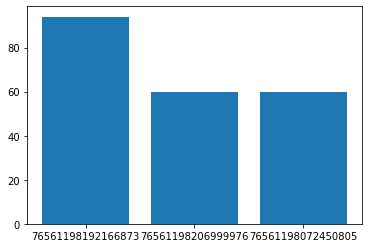

In [112]:
plt.bar(list(map(str, list(df_upd['author.steamid'].value_counts()[:3].index))), df_upd['author.steamid'].value_counts()[:3])

Looks great! One user updated **94** of his reviews, he surely played a lot of games and changed his mind a lot. Let's take a look at his reviews:

In [113]:
df_upd[df_upd['author.steamid'] == 76561198192166873]['review']

418649      [b][quote]欢迎订阅我的「个人鉴赏家[url=https://store.steam...
1617219     [b][quote]欢迎订阅我的鉴赏家[url=https://store.steampow...
2043742     [b][quote]欢迎订阅我的鉴赏家[url=https://store.steampow...
2257812     [b][quote]欢迎订阅我的鉴赏家[url=https://store.steampow...
2402269     [b][quote]欢迎订阅我的鉴赏家[url=https://store.steampow...
                                  ...                        
21333639    [b][quote]欢迎订阅我的鉴赏家[url=https://store.steampow...
21358159    [b][quote]欢迎订阅我的鉴赏家[url=https://store.steampow...
21417705    [b][quote]欢迎订阅我的鉴赏家[url=https://store.steampow...
21450205    [b][quote]欢迎订阅我的鉴赏家[url=https://store.steampow...
21659206    [b][quote]欢迎订阅我的鉴赏家[url=https://store.steampow...
Name: review, Length: 94, dtype: object

Uh... that user is actually just a spammer, what a shame. Maybe the second reviewer is a real gamer?

In [114]:
df_upd[df_upd['author.steamid'] == 76561198206999976]['review']

437525      [h1]Review zu The Witcher 3: Wild Hunt[/h1]\n\...
494944      [h1]Review zu Half-Life[/h1]\n\nHalf-Life ist ...
553345      [h1]Review zu Counter-Strike: Source[/h1]\n\nI...
830710      [h1]Review zu Portal 2[/h1]\n\n[b]Meine Güte i...
1628911     [h1]Review zu Sid Meier´s Civilization V[/h1]\...
2241593     [h1]Review zu Sid Meier’s Civilization® VI[/h1...
2376979     [h1]Review zu Subnautica[/h1]\n\nVor dem Kauf ...
2638069     [h1]Review zu Banished[/h1]\n\nBanished ist ei...
2686289     [h1]Review zu Celeste[/h1]\n\nCeleste selbst m...
2750249     [h1]Review zu A Hat in Time[/h1]\n\n[b]Meine G...
2994175     [h1]Review zu The Forest[/h1]\n\n[b]If the lig...
3288554     [h1]Review zu Axiom Verge[/h1]\n\nAxiom Verge ...
3295032     [h1]Review zu Guacamelee! Super Turbo Champion...
3355786     [h1]Review zu The Binding of Isaac: Rebirth[/h...
3442668     [h1]Review zu To the Moon[/h1]\n\n[b]DAS WICHT...
3490396     [h1]Review zu Shovel Knight: Treasure Trove[/h...
3508700 

Conclusion: Steam needs a better way to filter out spammers.

## Delete all the unnecessary variables to clear up memory

In [131]:
del df_upd
del time_mean
del m

## [RQ7] Of course, calculating probabilities is a job that any Data Scientist must know. Let's compute Some interesting figures.

- What’s the probability that a review has a Weighted Vote Score equal to or bigger than 0.5?
- What’s the probability that a review has at least one vote as funny given that the Weighted Vote Score is bigger than 0.5?
- Is the probability that “a review has at least one vote as funny” independent of the “probability that a review has a Weighted Vote Score equal or bigger than 0.5”?

### What’s the probability that a review has a Weighted Vote Score equal to or bigger than 0.5?

In [115]:
df_weighted_scores = df[df['weighted_vote_score'] >= 0.5]
probability_weighted_scores = df_weighted_scores.shape[0]/df.shape[0]

In [116]:
# Print result
print(probability_weighted_scores)

0.21763366600335704


### What’s the probability that a review has at least one vote as funny given that the Weighted Vote Score is bigger than 0.5?

In [117]:
# Remembering the formula P(A|B) = P(A∩B) / P(B)

# Updated my P(B) since it is only bigger than and not equal or bigger
df_weighted_scores = df[df['weighted_vote_score'] > 0.5]
probability_weighted_scores = df_weighted_scores.shape[0]/df.shape[0]

# Calculate intersection and conditional probability
total_cases = df.shape[0]
probability_intersection = df[(df['votes_funny'] >= 1) & (df['weighted_vote_score'] > 0.5)].shape[0]/total_cases
conditional_probability = probability_intersection/probability_weighted_scores

In [118]:
# Print result
print(conditional_probability)

0.1907611821507452


### Is the probability that “a review has at least one vote as funny” independent of the “probability that a review has a Weighted Vote Score equal or bigger than 0.5”?

In [119]:
# They are independent if P(A|B) = P(A) 
# I have to recalculate P(A|B) becouse P(A∩B) has changed again

# Updated intersection probability
probability_intersection_update = df[(df['votes_funny'] >= 1) & (df['weighted_vote_score'] >= 0.5)].shape[0]/total_cases

# Updated my P(B)
df_weighted_scores = df[df['weighted_vote_score'] >= 0.5]
probability_weighted_scores = df_weighted_scores.shape[0]/df.shape[0]

# Updated conditional probability
conditional_probability_update = probability_intersection_update/probability_weighted_scores

# Calculate my P(A)
probability_funny = df[(df['votes_funny'] >= 1)].shape[0]/total_cases

# Verify indipendence
if conditional_probability_update == probability_funny:
    print("Independent")
else:
    print("Not independent")

# Print results
print("P(A): " + str(probability_funny))
print("P(A|B): " + str(conditional_probability_update))

Not independent
P(A): 0.1168641367252768
P(A|B): 0.19038561452636957


## Delete all the unnecessary variables to clear up memory

In [132]:
del df_weighted_scores
del probability_weighted_scores
del total_cases
del probability_intersection
del conditional_probability
del probability_intersection_update
del conditional_probability_update
del probability_funny

## [RQ8] Every decision you take in a data-based environment should be reinforced with charts, statistical tests and analysis methods to check if a hypothesis is correct or not.

- Is there a significant difference in the Weighted Vote Score of reviews made in Chinese vs the ones made in Russian? Use an appropriate statistical test or technique and support your choice.
- Can you find any significant relationship between the time that a user lets pass before he updates the review and the Weighted Vote Score? Use an appropriate statistical test or technique and support your choice.
- Is there any change in the relationship of the variables mentioned in the previous literal if you include whether an application is recommended or not in the review? Use an appropriate statistical test or technique and support your choice.
- What are histograms, bar plots, scatterplots and pie charts used for?
- What insights can you extract from a Box Plot?

### [8.1] Is there a significant difference in the Weighted Vote Score of reviews made in Chinese vs the ones made in Russian? Use an appropriate statistical test or technique and support your choice.
### First of all let's divide Russian and Chinese datasets

In [134]:
Russian = df[df['language'] == 'russian']
Russian

,app_id,app_name,review_id,language,review,timestamp_created,timestamp_updated,recommended,votes_helpful,votes_funny,...,steam_purchase,received_for_free,written_during_early_access,author.steamid,author.num_games_owned,author.num_reviews,author.playtime_forever,author.playtime_last_two_weeks,author.playtime_at_review,author.last_played
11,292030,The Witcher 3: Wild Hunt,85182372,russian,"Шикарная игра с отличным сюжетом, неплохой гра...",1611376281,1611376281,True,0,0,...,True,False,False,76561198257031328,11,2,508.0,508.0,348.0,1.611387e+09
13,292030,The Witcher 3: Wild Hunt,85181146,russian,Замечательная карточная игра в антураже фэнтез...,1611374238,1611374309,True,0,0,...,True,False,False,76561197987104694,501,23,7310.0,0.0,7310.0,1.525555e+09
62,292030,The Witcher 3: Wild Hunt,85168239,russian,Безусловно одна из лучших и интереснейших игр....,1611354213,1611354213,True,0,0,...,True,False,False,76561198994938274,23,4,5026.0,977.0,5026.0,1.611354e+09
65,292030,The Witcher 3: Wild Hunt,85167888,russian,"Очень длинная бродилка)) Для любителей, вот ге...",1611353696,1611353696,True,0,0,...,True,False,False,76561198882440127,11,4,2228.0,0.0,2228.0,1.602971e+09
66,292030,The Witcher 3: Wild Hunt,85167706,russian,top,1611353447,1611353447,True,0,0,...,True,False,False,76561198056090375,67,4,1873.0,1859.0,1813.0,1.611386e+09
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38747299,323190,Frostpunk,47011188,russian,Игра открытие года. Просто Вау!,1224611132,1224611132,True,0,0,...,True,False,False,76561197930117904,30,1,1544.0,0.0,1510.0,1.207345e+09
38747301,323190,Frostpunk,47010905,russian,"Градостроительные стратегии, как правило, выпу...",1030743996,1030743996,True,0,1,...,True,False,False,76561197922244176,206,60,360.0,0.0,344.0,1.026485e+09
38747321,323190,Frostpunk,47005618,russian,"Очень неплоха, достаточно хардкорна и своебразна",1558614933,1565180777,True,0,0,...,False,False,False,76561197886015696,176,2,425.0,0.0,425.0,1.542430e+09
38747326,323190,Frostpunk,47004993,russian,Огонь,1389914659,1389914659,True,0,0,...,True,True,False,76561197917574608,3,17,8324.0,0.0,6520.0,1.387898e+09


In [135]:
Chinese = df[(df['language'] == 'schinese') | (df['language'] == 'tchinese')]
Chinese

,app_id,app_name,review_id,language,review,timestamp_created,timestamp_updated,recommended,votes_helpful,votes_funny,...,steam_purchase,received_for_free,written_during_early_access,author.steamid,author.num_games_owned,author.num_reviews,author.playtime_forever,author.playtime_last_two_weeks,author.playtime_at_review,author.last_played
0,292030,The Witcher 3: Wild Hunt,85185598,schinese,不玩此生遗憾，RPG游戏里的天花板，太吸引人了,1611381629,1611381629,True,0,0,...,True,False,False,76561199095369542,6,2,1909.0,1448.0,1909.0,1.611343e+09
1,292030,The Witcher 3: Wild Hunt,85185250,schinese,拔DIAO无情打桩机--杰洛特!!!,1611381030,1611381030,True,0,0,...,True,False,False,76561198949504115,30,10,2764.0,2743.0,2674.0,1.611386e+09
2,292030,The Witcher 3: Wild Hunt,85185111,schinese,巫师3NB,1611380800,1611380800,True,0,0,...,True,False,False,76561199090098988,5,1,1061.0,1061.0,1060.0,1.611384e+09
4,292030,The Witcher 3: Wild Hunt,85184287,schinese,大作,1611379427,1611379427,True,0,0,...,True,False,False,76561199028326951,7,4,217.0,42.0,217.0,1.610788e+09
8,292030,The Witcher 3: Wild Hunt,85183227,schinese,年度最佳的作品，没啥好夸的，神作,1611377703,1611377703,True,0,0,...,True,False,False,76561198130808993,581,17,6921.0,222.0,6921.0,1.611317e+09
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38747330,323190,Frostpunk,47004073,schinese,好玩，头一天玩了11个小时，虽说造仓库存煤炭把游戏造崩溃了,993617668,993617668,True,0,0,...,False,False,False,76561197934878992,62,2,2234.0,0.0,1531.0,9.834996e+08
38747332,323190,Frostpunk,47004005,schinese,终于弄懂了什么是越界，秩序给了我们力量！,1257677556,1270952034,True,1,0,...,True,False,False,76561197865247152,28,11,6566.0,0.0,3055.0,1.251471e+09
38747338,323190,Frostpunk,47001839,schinese,好游戏，这值得吗？值得。\n为了人民的生存，我开终极法令也值得。,1540174033,1540174033,True,0,0,...,False,False,False,76561197953446176,201,1,17558.0,0.0,5839.0,1.538777e+09
38747344,323190,Frostpunk,47000636,schinese,好玩。,991023698,991023698,True,0,0,...,True,False,False,76561197945461264,4,2,2967.0,0.0,2618.0,9.761672e+08


### Let's see the mean, variance and standard deviation of Russian reviews and its distribution

Mean:  0.2118238207384872
Variance:  0.06626347737708621
STD:  0.25741693296495904


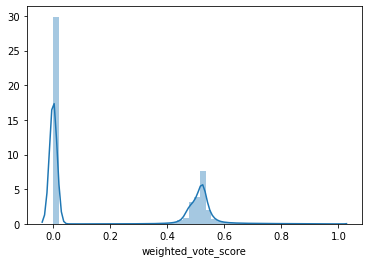

In [136]:
sns.distplot(Russian['weighted_vote_score'])
print("Mean: ", Russian['weighted_vote_score'].mean())
print("Variance: ", Russian['weighted_vote_score'].var())
print("STD: ", Russian['weighted_vote_score'].std())

### Something's off, let't not consider weighted scored that are equal to 0

Mean:  0.5180852416494958
Variance:  0.003399699895496862
STD:  0.05830694551678095


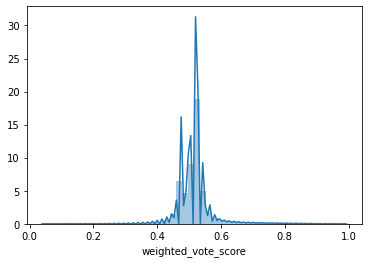

In [137]:
sns.distplot(Russian[Russian['weighted_vote_score'] > 0]['weighted_vote_score'])
print("Mean: ", Russian[Russian['weighted_vote_score'] > 0]['weighted_vote_score'].mean())
print("Variance: ", Russian[Russian['weighted_vote_score'] > 0]['weighted_vote_score'].var())
print("STD: ", Russian[Russian['weighted_vote_score'] > 0]['weighted_vote_score'].std())

### The line looks messy, but the mean and the distribution seems correct

### Same things for the Chinese reviews

Mean:  0.5276654777033265
Variance:  0.005784271999017236
Standard Deviation:  0.07605440157556455


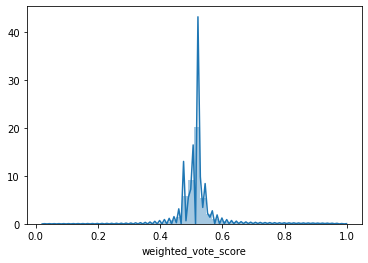

In [138]:
sns.distplot(Chinese[Chinese['weighted_vote_score'] > 0]['weighted_vote_score'])
print("Mean: ", Chinese[Chinese['weighted_vote_score'] > 0]['weighted_vote_score'].mean())
print("Variance: ", Chinese[Chinese['weighted_vote_score'] > 0]['weighted_vote_score'].var())
print("Standard Deviation: ", Chinese[Chinese['weighted_vote_score'] > 0]['weighted_vote_score'].std())

### Now for hypothesis testing. We are going to use the T-Test to compare if there is a significant difference between the means of Russian and Chinese weighted vote scores

In [139]:
from scipy.stats import ttest_ind

Hypothesis: Is there a significant difference in the Weighted Vote Score of reviews made in Chinese vs the ones made in Russian?

In [140]:
ttest, pval = ttest_ind(Russian['weighted_vote_score'], Chinese['weighted_vote_score'])
print("p-value: ", pval)
if pval < 0.005:
    print("Rejecting null hypothesis: the difference is insignificant")
else:
    print("Accepting null hypothesis: the difference is significant")

p-value:  0.0
Rejecting null hypothesis: the difference is insignificant


### [8.2] Can you find any significant relationship between the time that a user lets pass before he updates the review and the Weighted Vote Score? Use an appropriate statistical test or technique and support your choice.

### First let's consider only those reviews which were updated at any time and have the weighted vote score of bigger than 0

In [141]:
df_upd = df[(abs(df['timestamp_created']-df['timestamp_updated']) > 0) & df['weighted_vote_score'] > 0]
df_upd

,app_id,app_name,review_id,language,review,timestamp_created,timestamp_updated,recommended,votes_helpful,votes_funny,...,steam_purchase,received_for_free,written_during_early_access,author.steamid,author.num_games_owned,author.num_reviews,author.playtime_forever,author.playtime_last_two_weeks,author.playtime_at_review,author.last_played
27,292030,The Witcher 3: Wild Hunt,85177648,schinese,🎁\n🎁’[h1] [b]‘官方奖励免费活动链接:→ https://usnhskhf.w...,1611368730,1611379495,True,39,0,...,True,False,False,76561198326913512,69,28,1734.0,0.0,1734.0,1.608667e+09
721,292030,The Witcher 3: Wild Hunt,85039997,english,"The Witcher 3 is the greatest game ever made, ...",1611158900,1611243355,True,1,0,...,True,False,False,76561198966856935,16,1,6116.0,2776.0,5124.0,1.611368e+09
792,292030,The Witcher 3: Wild Hunt,85030619,turkish,Oyun bug lı. Çok hata var ve acayip sinirlendi...,1611146661,1611147086,False,0,0,...,True,False,False,76561198335936848,59,6,303.0,28.0,303.0,1.610741e+09
900,292030,The Witcher 3: Wild Hunt,85011047,schinese,“我是利维亚的杰洛特。“\n”我是杰洛特的叶奈法。“,1611112971,1611187571,True,0,0,...,True,False,False,76561198142358615,43,17,2314.0,1215.0,2295.0,1.611327e+09
962,292030,The Witcher 3: Wild Hunt,84996010,russian,"Мне понравилось , мир с кучей дополнительного ...",1611088439,1611088511,True,1,0,...,True,False,False,76561198181264826,94,13,7250.0,2227.0,7098.0,1.611351e+09
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38747281,323190,Frostpunk,47017065,english,An interesting take on a city builder. Adds su...,1492158574,1499563340,True,3,45,...,True,False,True,76561197870834080,12,1,1148.0,0.0,1131.0,1.480408e+09
38747322,323190,Frostpunk,47005582,schinese,[h1] 新家两周目通关。[/h1]\n\n[h1]玩第一周目的感受：[/h1]\n在舒适享...,1322509001,1330844425,True,1,0,...,True,False,False,76561197863574400,118,44,428.0,0.0,428.0,1.317291e+09
38747334,323190,Frostpunk,47003602,english,Challenging city builder with great flavor. Mo...,1186254259,1195021844,True,0,1,...,True,False,False,76561197929128960,62,1,1640.0,0.0,1564.0,1.172031e+09
38747352,323190,Frostpunk,46996288,english,"One of the missing things was an endless mode,...",1114916638,1124580377,True,0,0,...,True,False,False,76561197891071424,278,5,1706.0,0.0,813.0,1.108079e+09


### What is the mean value of the time in which people update their reviews?

In [142]:
time_mean = pd.to_datetime((df_upd['timestamp_updated'] - df_upd['timestamp_created']), unit='s').mean()
time_mean

Timestamp('1970-07-25 18:44:47.832721782')

In [143]:
print("Mean: " + str(time_mean)[5:7] + ' months ' + str(time_mean)[8:10] + ' days ' + str(time_mean)[11:19])

Mean: 07 months 25 days 18:44:47


This means that the mean value of the time that passes between initial and updated reviews is 11 months apart.

That's almost an year! Let's see if people who waited more than 11 months before changing their reviews differ from those who just casually update their reviews.

### Now let's take a look at the distribution of the time that passed after people updated their reviews

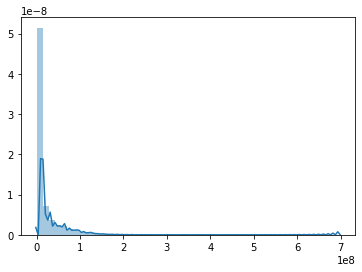

In [144]:
sns.distplot((df_upd['timestamp_updated'] - df_upd['timestamp_created']))

### Most of it is in the first half. Let's divide the distribution to the left and right sides of the mean and compare them

In [146]:
right_mean = df_upd[(df_upd['timestamp_updated'] - df_upd['timestamp_created']) > (df_upd['timestamp_updated'] - df_upd['timestamp_created']).mean()]

In [147]:
left_mean = df_upd[(df_upd['timestamp_updated'] - df_upd['timestamp_created']) < (df_upd['timestamp_updated'] - df_upd['timestamp_created']).mean()]

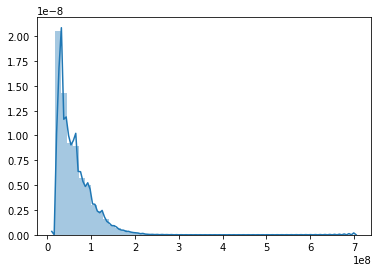

In [148]:
sns.distplot((right_mean['timestamp_updated'] - right_mean['timestamp_created']))

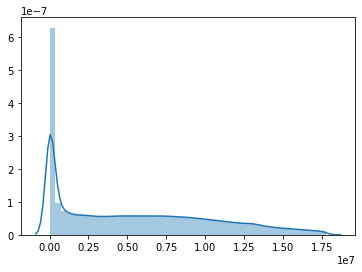

In [149]:
sns.distplot((left_mean['timestamp_updated'] - left_mean['timestamp_created']))

### Comparing means and stds of the main set and two subsets

In [150]:
print("mean:", df_upd['weighted_vote_score'].mean())
print("std:", df_upd['weighted_vote_score'].std())

mean: 0.520652960346071
std: 0.07028998645728976


In [151]:
print("mean:", left_mean['weighted_vote_score'].mean())
print("std:", left_mean['weighted_vote_score'].std())

mean: 0.5207484891914276
std: 0.07216340540272317


In [152]:
print("mean:", right_mean['weighted_vote_score'].mean())
print("std:", right_mean['weighted_vote_score'].std())

mean: 0.5203369375560839
std: 0.06370008521950606


### We are going to use Z-Test for this hypothesis

In [153]:
from scipy import stats
from statsmodels.stats import weightstats as stests

Hypothesis: Is there any significant relationship between the time that a user lets pass before he updates the review and the Weighted Vote Score?

In [154]:
ztest, pval1 = stests.ztest(left_mean['weighted_vote_score'], right_mean['weighted_vote_score'])
print("p-value:", float(pval1))
if pval1<0.005:
    print("Rejecting null hypothesis: The time passed between reviews doesn't affect the Weighted Vote Score")
else:
    print("Accepting null hypothesis: The time passed between reviews affects the Weighted Vote Score")

p-value: 0.00019177905991688704
Rejecting null hypothesis: The time passed between reviews doesn't affect the Weighted Vote Score


### [8.3] Is there any change in the relationship of the variables mentioned in the previous literal if you include whether an application is recommended or not in the review? Use an appropriate statistical test or technique and support your choice.

### Let's divide the dataset that we used above into two groups: recommended and not

In [155]:
rec_t = left_mean[left_mean['recommended'] == True]
rec_f = left_mean[left_mean['recommended'] == False]

In [156]:
rec_t1 = right_mean[right_mean['recommended'] == True]
rec_f1 = right_mean[right_mean['recommended'] == False]

### Checking the important information about the subsets

In [157]:
print("Mean: ", rec_t['weighted_vote_score'].mean())
print("Var: ", rec_t['weighted_vote_score'].var())
print("Std: ", rec_t['weighted_vote_score'].std())

Mean:  0.5294586712894891
Var:  0.004685763242197705
Std:  0.06845263502742392


In [158]:
print("Mean: ", rec_t1['weighted_vote_score'].mean())
print("Var: ", rec_t1['weighted_vote_score'].var())
print("Std: ", rec_t1['weighted_vote_score'].std())

Mean:  0.5246687316702047
Var:  0.004030726485377811
Std:  0.06348800268852227


In [159]:
print("Mean: ", rec_f['weighted_vote_score'].mean())
print("Var: ", rec_f['weighted_vote_score'].var())
print("Std: ", rec_f['weighted_vote_score'].std())

Mean:  0.4944791285973177
Var:  0.0058623764755810995
Std:  0.07656615750826927


In [160]:
print("Mean: ", rec_f1['weighted_vote_score'].mean())
print("Var: ", rec_f1['weighted_vote_score'].var())
print("Std: ", rec_f1['weighted_vote_score'].std())

Mean:  0.5041120445212112
Var:  0.0038252384122861804
Std:  0.0618485118033262


### And of course plot the distribution

#### Between recommended dataframes with different passed time on updating their reviews

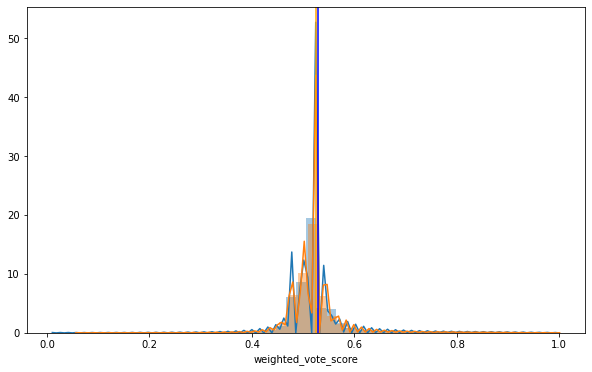

In [161]:
plt.figure(figsize = (10, 6))
ax1 = sns.distplot(rec_t['weighted_vote_score'])
ax2 = sns.distplot(rec_t1['weighted_vote_score'])
plt.axvline(rec_t['weighted_vote_score'].mean(), color='b')
plt.axvline(rec_t1['weighted_vote_score'].mean(), color='orange')

#### Between not recommended dataframes with different passed time on updating their reviews

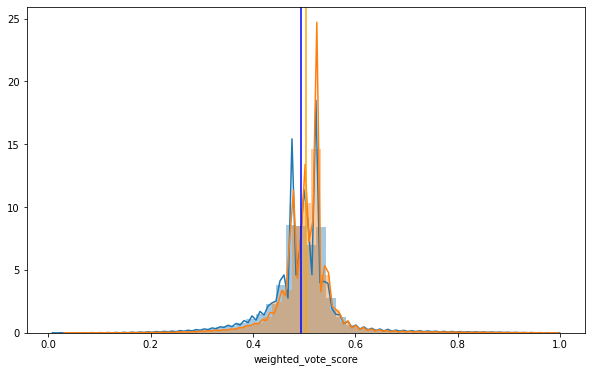

In [162]:
plt.figure(figsize = (10, 6))
ax1 = sns.distplot(rec_f['weighted_vote_score'])
ax2 = sns.distplot(rec_f1['weighted_vote_score'])
plt.axvline(rec_f['weighted_vote_score'].mean(), color='b')
plt.axvline(rec_f1['weighted_vote_score'].mean(), color='orange')

#### Between recommended and not recommended dataframes

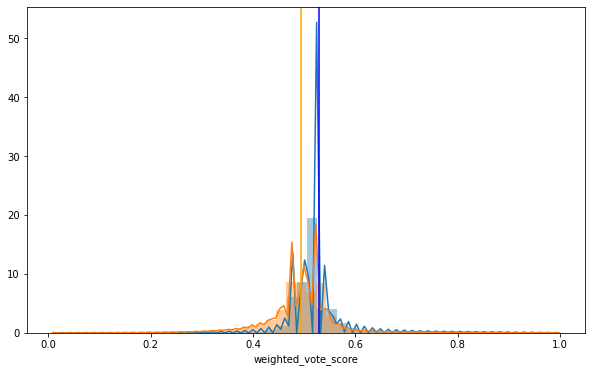

In [163]:
plt.figure(figsize = (10, 6))
ax1 = sns.distplot(rec_t['weighted_vote_score'])
ax2 = sns.distplot(rec_f['weighted_vote_score'])
plt.axvline(rec_t['weighted_vote_score'].mean(), color='b')
plt.axvline(rec_f['weighted_vote_score'].mean(), color='orange')

#### Between recommended and not recommended dataframes with updated reviews after a long time

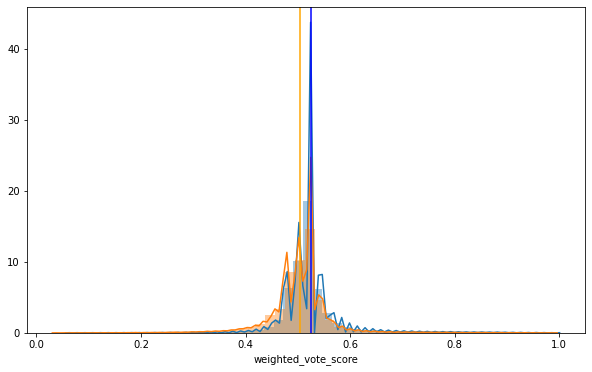

In [164]:
plt.figure(figsize = (10, 6))
ax1 = sns.distplot(rec_t1['weighted_vote_score'])
ax2 = sns.distplot(rec_f1['weighted_vote_score'])
plt.axvline(rec_t1['weighted_vote_score'].mean(), color='b')
plt.axvline(rec_f1['weighted_vote_score'].mean(), color='orange')

### Distributions are mostly similar, only the recommended and not recommended are a little different. Anyway, the hypothesis testing will tell us the truth

In [165]:
ztest1, pval2 = stests.ztest(rec_t1['weighted_vote_score'], rec_f['weighted_vote_score'])
print("p-value:", float(pval2))
if pval2 < 0.005:
    print("Rejecting null hypothesis: The time passed between reviews and recommendation doesn't affect the Weighted Vote Score")
else:
    print("Accepting null hypothesis: The time passed between reviews and recommendation affects the Weighted Vote Score")

p-value: 0.0
Rejecting null hypothesis: The time passed between reviews and recommendation doesn't affect the Weighted Vote Score


I saw that coming from miles away. Even the true/false values on recommendations are not enough to make the difference.

###  [8.4] What are histograms, bar plots, scatterplots and pie charts used for?

Different types of plotting data can give us different visual information about that data. They mostly used to visualize and present the main information in the data to people.

In our homework we used bar plots, pie charts and distribution plots.

Histograms and bar plots are convinient to use when we want to show the general numbers of some data. Here is one of the bar plots we used to visualize which languages were more popular in reviews (from [RQ1]):

<BarContainer object of 28 artists>

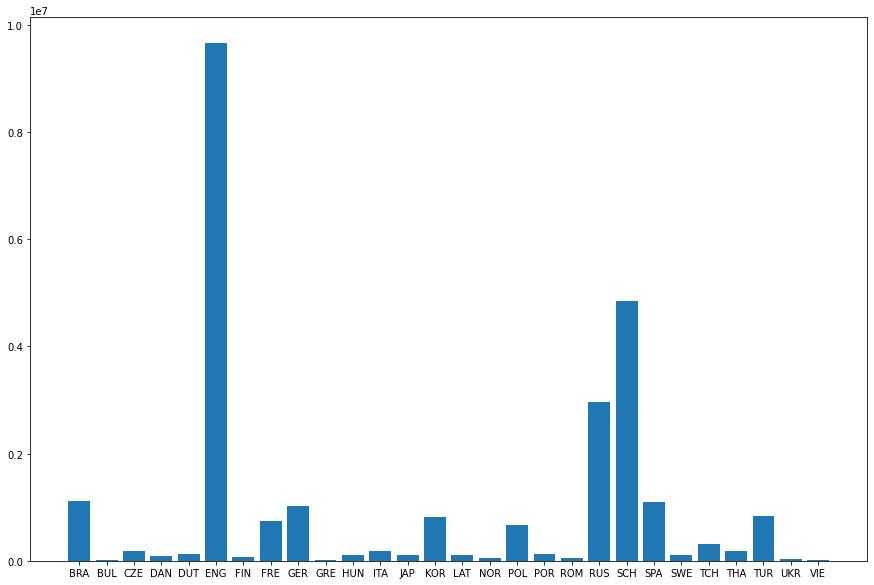

In [61]:
plt.figure(figsize = (15, 10))
plt.bar([''.join(str(x)[:3].upper()) for x in lang_count.index], lang_count['author.steamid'])

Pie charts mostly used to show the percentage difference between different information. Here we used pie chart to show what percentage of reviews were positive and what percentage were negative:

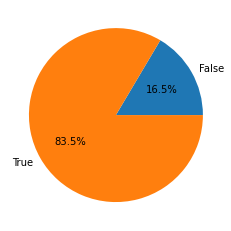

In [52]:
plt.pie(recommeplt.pie(recommended['author.steamid'], labels = recommended.index, autopct='%1.1f%%')
plt.show() nded['author.steamid'], labels = recommended.index, autopct='%1.1f%%')
plt.show() 

Scatterplots are mainly used to show the correlation between two different arrays. I don't think we really needed scatter plots in our code because we didn't do any kind of linear or logistic regression, but here is some random scatter plot to show how it works: 

The scatterplot below shows the correlation between the reviewer's playtime and the weighted vote score. 

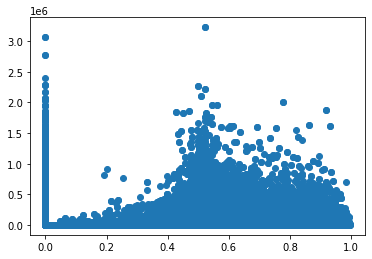

In [167]:
plt.scatter(df['weighted_vote_score'], df['author.playtime_at_review'])

### [8.5] What insights can you extract from a Box Plot?

Box plots can beatifully show us the quatiles of any numeric data. It's mainly used to filter out the outliers (exceptional values or errors). For example, in the scatterplot above we can see one little dot at the very top by y-axis and in the middle by x-axis. It's all alone over there, which is considered as an outlier.

Let's use box plot to show what amount of apps most of the people own:

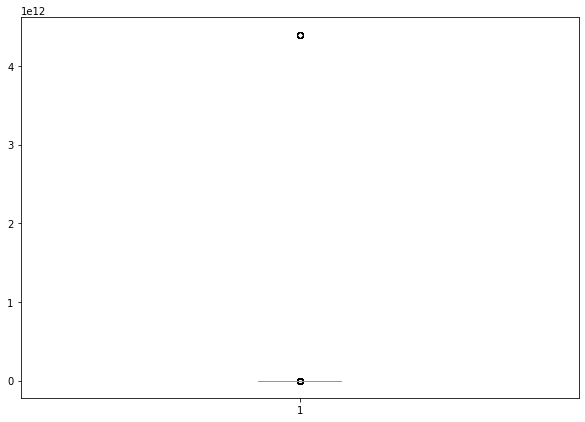

In [168]:
plt.figure(figsize =(10, 7))
plt.boxplot(df['author.num_games_owned'])
plt.show()

Wow, that one dot is absolutely an outlier. There's no way somebody own that many apps, there aren't even that many out there. Let's take a smaller number:

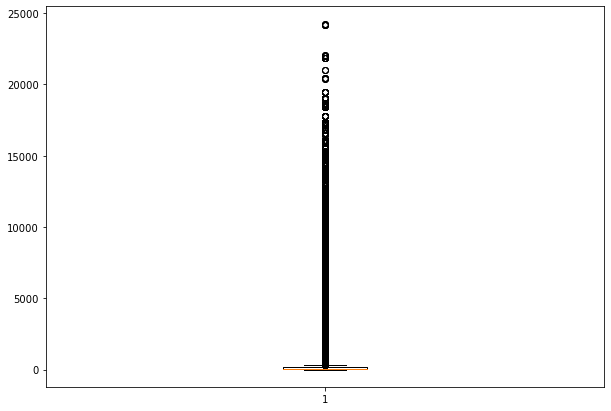

In [169]:
plt.figure(figsize =(10, 7))
plt.boxplot(df[df['author.num_games_owned'] < 100000]['author.num_games_owned'])
plt.show()

Maybe using _author.num_games_owned_ is not the best idea, but but we can see that the biggest margin of people own less than a thousand, no, **hundred** applications:

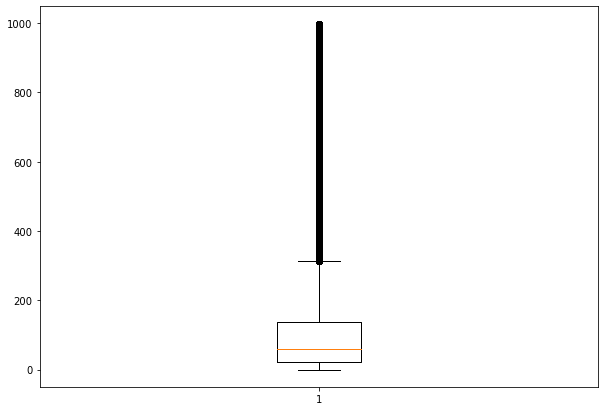

In [170]:
plt.figure(figsize =(10, 7))
plt.boxplot(df[df['author.num_games_owned'] < 1000]['author.num_games_owned'])
plt.show()

I myself own only 20 apps lol.

Some madlads own more than 20000 apps, they are most likely the steam developers or some different exceptions.

That's basically how we use box plots, not the best example though, but I guess we could explain its main purpose.

# Theoretical Questions

## TQ1

We are given the following algorithm.

```
Input: 
    A: array of length n
    k: integers between 1 and n
    
function alg(A, k):
  s <-- a random element of A
  set L = [all the elements of A with value <= s]
  set R = [all the elements of A with value > s]
  r = len(L)
  if k == r:
    return s
  else if k < r:  
    return alg(L, k)
  else:
    return alg(R, k - r)
```

1.What does the algorithm compute?

This algorithm is similar to the binary search algorithm, but the difference is that in the binary search algorithm, the interval is equally divided from the middle each time, and in this algorithm, the interval (array) is randomly divided each time according to s.

The rest of the algorithm is the same as the binary search algorithm, its purpose is to find the kth target element in the 1-n length array.



2.What is asymptotically (i.e., we are asking for big-O complexity) the running time of the algorithm in the worst case, as a function of n?

The worst case is that we cut all of other elements by steps, and the last array A only has the element we want.

Because s is a random element, so the running time of this algorithm can be describe as follow:

$$T(n) = \frac{1}{p}T(1)+\frac{1}{p}T(2)+···+\frac{1}{p}T(n) + 1 $$

For T(n), n = p. We can get the equation below:

$T(n)=(T(1)+T(2)+\ldots \ldots+T(n)) / n+1$

$n^{*} T(n)=T(1)+T(2)+\ldots+T(n)+n$

For T(n-1), we can get equation by same way:

$(n-1) * T(n-1)=T(1)+T(2)+\cdots \cdot+T(n-1)+n-1$

Calculate nT(n) - (n-1)T(n-1):

$n^{*} T(n)-(n-1) * T(n-1)=T(n)+1$

By simplifying the above formula, we can get:

$T(n)=1 /(n-1)+T(n-1)$

By recursing the above formula, we can get:

$T(n)=1 /(n-1)+1 /(n-2)+T(n-2)$

$T(n)=1 /(n-1)+1 /(n-2)+1 /(n-3)+T(n-3)$

······

$T(n)=1+1 / 2+1 / 3+\ldots+1 /(n-1)$

We can get that T(n) is equal to (n-1)th Harmonic number, and $\sum_{n=1}^{k} \frac{1}{n}=\ln k+\gamma+\varepsilon_{k}$

Hence T(n) is O($\log n$)

3.What is asymptotically the running time of the algorithm in the best case?
In best case, it means we can get the target value in first random selection of s. Hence the running time in this situation is O(1).

## [TQ2]
### Question 1
There are no constraints to values in the code, but we need to specificy only that the parameter $n$ must be $n < len(a)$ to not encounter in a “list index out of range exception” and $n > 0$ becouse we cannot compute the algorithm on a 0 lenght sub-list.

The computation analysis starts from the smaller function $swapList()$ that has a time complexity of $O(n)$ as shown:
$$
\sum_{i=0}^{n/2}[\Theta(1)+\Theta(1)+\Theta(1)] \approx \frac{n}{2}(3*\Theta(1)) =\Theta(\frac{3}{2}n)\approx O(n)
$$
After that we can compute the complexity of the $splitSwap()$ function, that is a recursive function, so we have:

Basic case:

$$
T(n=1) = \Theta(1)
$$

General recursive case:

$$
T(n)=T(\frac{n}{2})+T(\frac{n}{2})+\Theta(\frac{3}{2}n)=2T(\frac{n}{2})+\Theta(\frac{3}{2}n)
$$

We can expand it calculating for $T(\frac{n}{2})$.

So we obtain:

$$
T(n)=2*[2*T(\frac{\frac{n}{2}}{2})+\Theta(\frac{3}{2}*\frac{n}{2})]+\Theta(\frac{3}{2}n)\\
    =4*T(\frac{n}{4})+2*\frac{1}{2}*\Theta(\frac{3}{2}n)+\Theta(\frac{3}{2}n)\\
    =4*T(\frac{n}{4})+2*\Theta(\frac{3}{2}n)\\
    =2^{2}*T(\frac{n}{2^{2}})+2*\Theta(\frac{3}{2}n)
$$

We can expand more calculating for $T(\frac{n}{4})$

$$
T(n)=4*[2*T(\frac{\frac{n}{4}}{2})+\Theta(\frac{3}{2}*\frac{n}{4})]+2*\Theta(\frac{3}{2}n)\\=
8*T(\frac{n}{8})+4*\frac{1}{4}*\Theta(\frac{3}{2}n)+2*\Theta(\frac{3}{2}n)\\=
8*T(\frac{n}{8})+3*\Theta(\frac{3}{2}n)\\=
2^{3}*T(\frac{n}{2^{3}})+3*\Theta(\frac{3}{2}n)
$$

Expanding after that in the same way, it can be possible to recognize a path:

$$
T(n)=2^{i}*T(\frac{n}{2^{i}})+i*\Theta(\frac{3}{2}n)
$$

And it stops, according to the code, when $n <= 1$, so when $n = 1$ according to our constraints, that corresponds to a value of $i$:
$$
\frac{n}{2^{i}}=1\Rightarrow n=2^{i}\Rightarrow i=\log_2 n
$$

We can substitute the value of $i$ applying a property of logarithm that is $n = 2^{\log_2 n}$

So we obtain:
$$
n*T(1)+log_2 (n)*\Theta(\frac{3}{2}n)
$$

Applying Big O analysis we can simply writing:
$$
\approx O(n)+O(log(n)*n) = O(n*log(n))
$$

So the complexity (with O-notation) is $O(n*log(n))$ 

### Question 2

This algorithm, based on the function **“splitSwap()”** called recursively two times, is taking an array **“a”** as input and change its elements such that, starting from the index chosen **“l”** it swap element following instruction given by the internal method **“swapList()”** until the value of n is <= 1. The value **“n”**, which is also a parameter of the function, represent the final length of the swapped sub-list.

More precisely, the internal function **“swapList()”**, using a  temporary variable inside a for cicle that loops from 0 to n/2 the index i, reverses the values of the element at index **l+i** with the element at index  **l+i+n/2**.

To be clearer with an example, this is the output of the algorithm (printed array “a”) using as parameters:
- a is an array containing ordered integers from 0 to 20 (ordered only for a better vision reason, because values corresponds to indexes)
- n = 4
- l = 5

Output showing steps: 

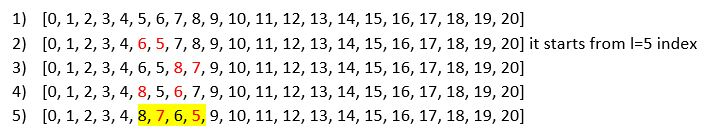

In [4]:
from IPython.display import Image
Image(filename='TQ2_screen_1.jpg')

In red there are the swapped elements on each iteration and highlighted there is the final string, that in fact has n=4 as a length.

Another example could be with:
- n = 10
- l = 5

Output showing steps: 

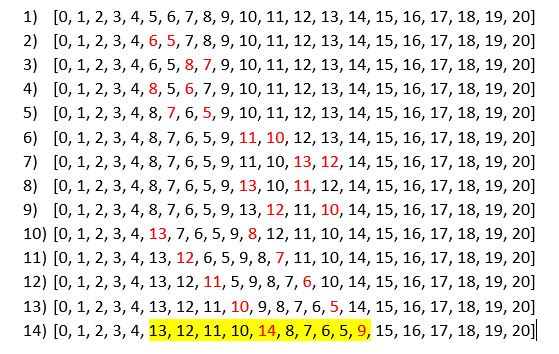

In [5]:
from IPython.display import Image
Image(filename='TQ2_screen_2.jpg')

As it could be expected the length of the string is n = 10 and the algorithm starts to compute from index l = 5.
There are two important observations:

- To be careful to maintain values of n and l such that **len(a) > l + n/2 + I** to not encounter in a “list index out of range exception”.
- To be careful giving **odd values to n**, since there is a division by 2. In most of the programming language it’s not possible to iterate over float numbers, so we have to use *to_int* functions like round() in Python.

Finally, the algorithm is not optimal because it could be possible to create a better one with complexity $O(n)$, using a direct for loop in which for every iteration, $n$ is divided by 2 and then the swaps are computed, both with $l$ index and with $l+\frac{n}{2}$ 

## TQ3

What is asymptotically the running time of the algorithm in the best case?

In best case, it means we can get the target value in first random selection of s. Hence the running time in this situation is O(1).

In the knapsack problem we are given n objects and each object *i* has a weight *w_i* and a value *v_i*. We are also given a weight budget *W*. The problem is to select a set of objects with total weight bounded by *W* that maximized the sum of their values. The following are three natural heuristics:

- Order them in increasing order of weight and then visit them sequentially, adding them to the solution as long as the budget is not exceeded
- Order them in decreasing order of values, and then visit them sequentially, adding them to the solution if the budget is not exceeded
- Order them in decreasing relative value *(v_i / w_i)*, and then visit them sequentially, adding them to the solution if the budget is not exceeded

For each of the heuristics, provide a counterexample, that is, an example of a problem instance in which the heuristic fails to provide the optimal solution.



1) order by weight 

|   ID   |  1   |  2   |  3   |  4   |  5   |
| :----: | :--: | :--: | :--: | :--: | :--: |
| weight |  2   |  2   |  6   |  5   |  4   |
| value  |  2   |  3   |  7   |  5   |  4   |

We assume that weight bounded is C = 10.

In the case above, order by weight. We can get table below:

|   ID   |  1   |  2   |  5   |  4   |  3   |
| :----: | :--: | :--: | :--: | :--: | :--: |
| weight |  2   |  2   |  4   |  5   |  6   |
| value  |  2   |  3   |  4   |  5   |  7   |

By first heuristic, we will chose 1 2 5 as the solution. Total value is 2+3+4 = 9, and total weight is 8. But if we chose 1 2 3, total value is 12, and total weight is 10. this solution is better than what we get from first heuristics. It fails to provide the optimal solution.



2) order by value

We use the same case above. After sorting by value, we get table below:

|   ID   |  3   |  4   |  5   |  2   |  1   |
| :----: | :--: | :--: | :--: | :--: | :--: |
| weight |  6   |  5   |  4   |  2   |  2   |
| value  |  7   |  5   |  4   |  3   |  2   |

By second heuristic, we will chose 3 5 as the solution.  Total value is 4+7 = 11, and total weight is 10.  But if we chose 1 2 3, total value is 12, and total weight is 10. this solution is better than what we get from second heuristics. It fails to provide the optimal solution.



3) order by ($v_i / w_i$)

In this part we consider a new example:

|      ID      |  1   |  2   |  3   |  4   |  5   |
| :----------: | :--: | :--: | :--: | :--: | :--: |
|    weight    |  20  |  30  |  40  |  50  |  90  |
|    value     |  38  |  57  |  50  |  98  | 180  |
| value/weight | 1.9  | 1.9  | 1.25 | 1.96 |  2   |

We assume that weight bounded is C = 100.

In this example, if we chose the object by third heuristics, we will chose 5. Total value is 180, and total weight is 90. But if we chose 1 2 4, total value is 193, and total weight is 100. this solution is better than what we get from third heuristics. It fails to provide the optimal solution.